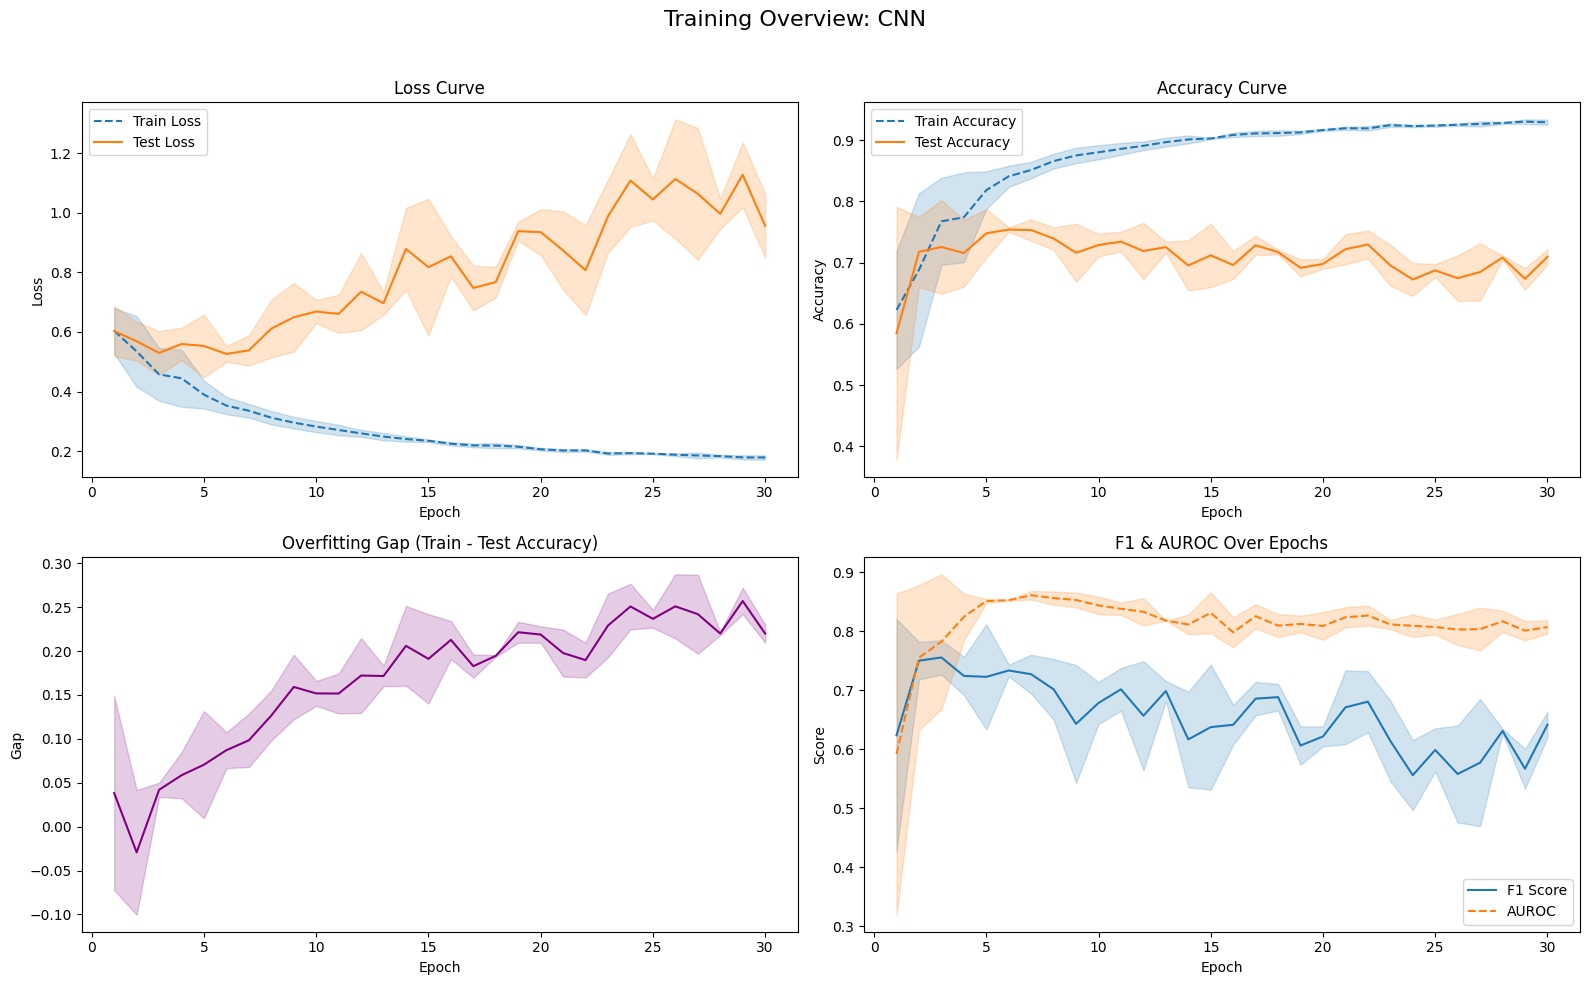

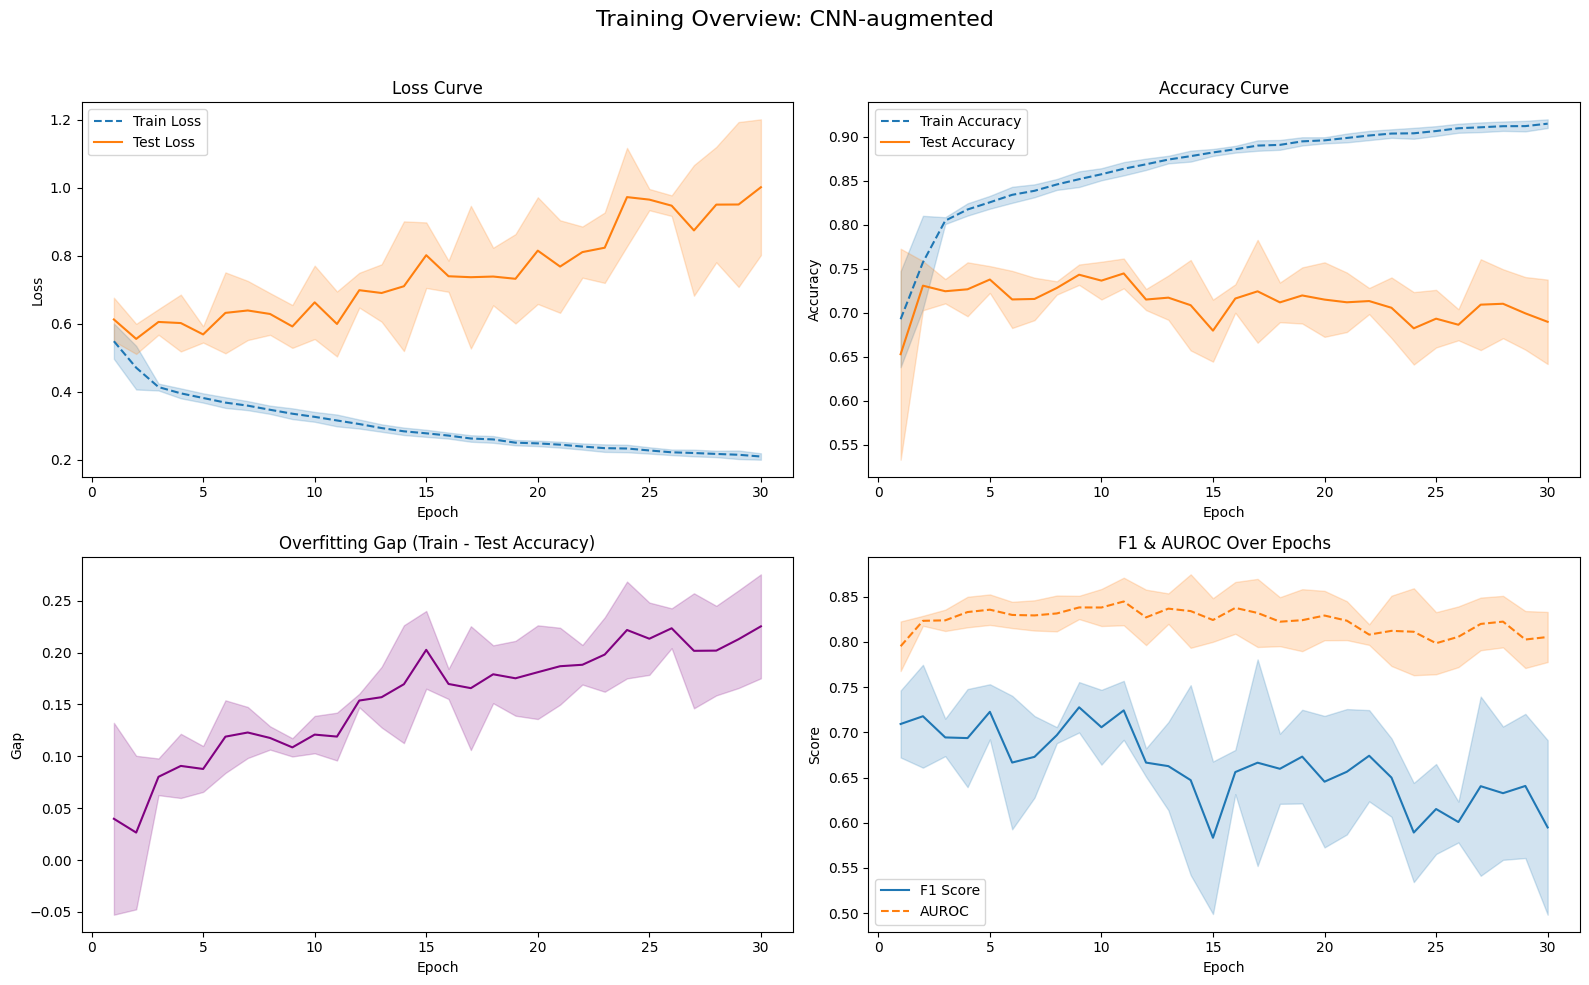

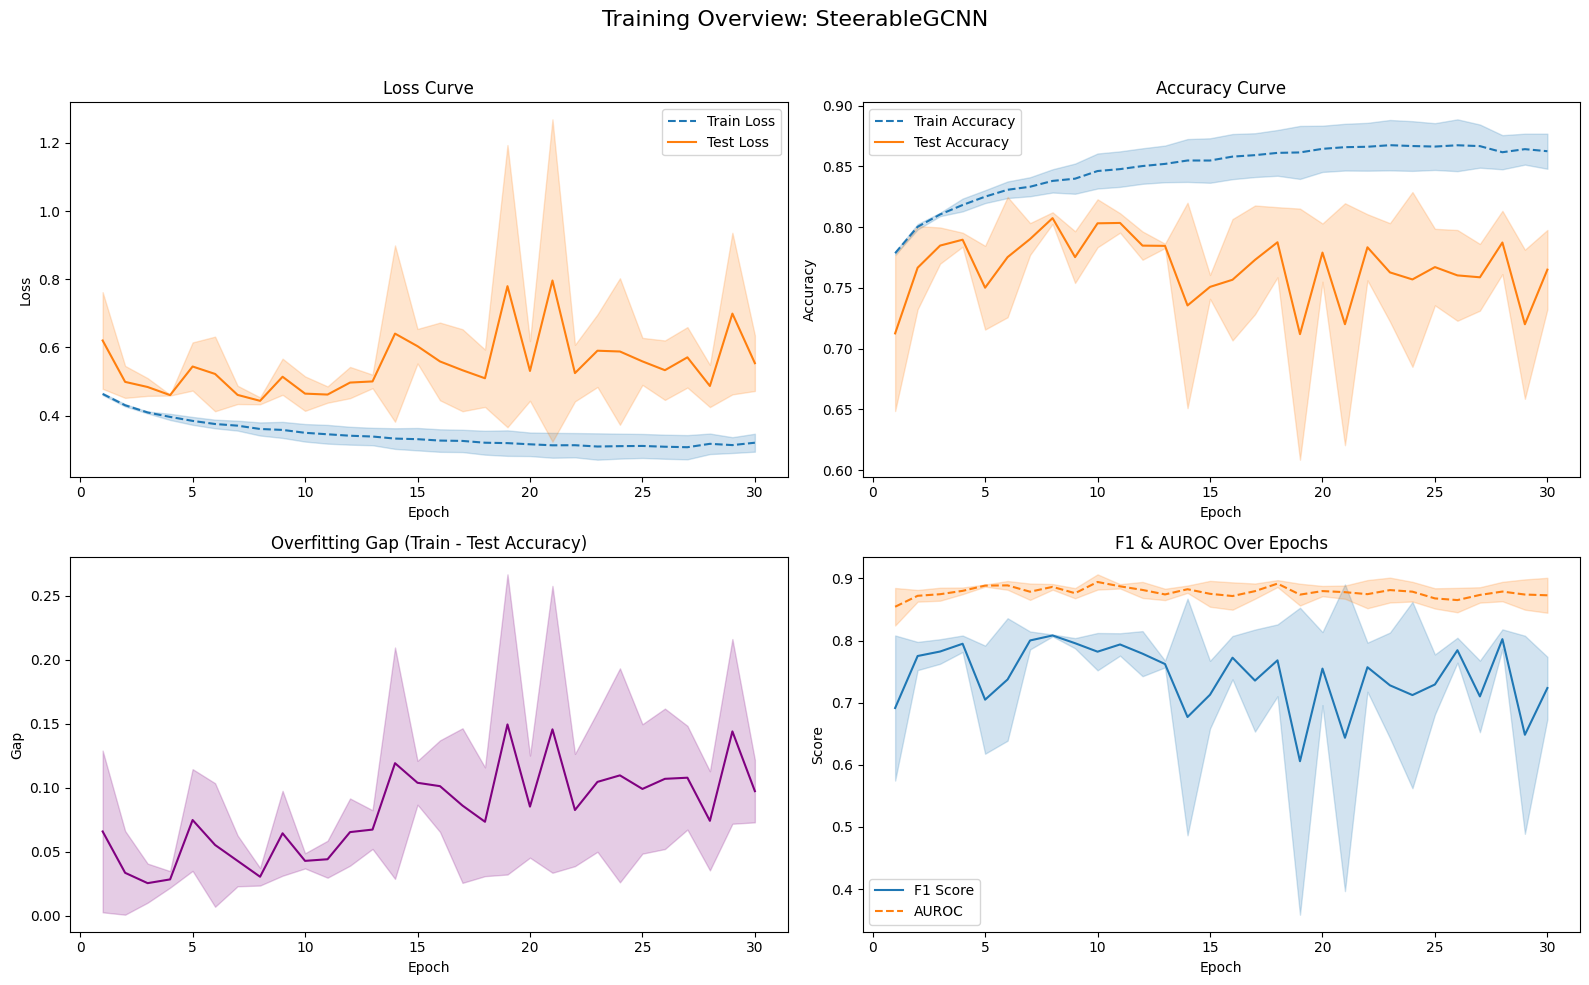

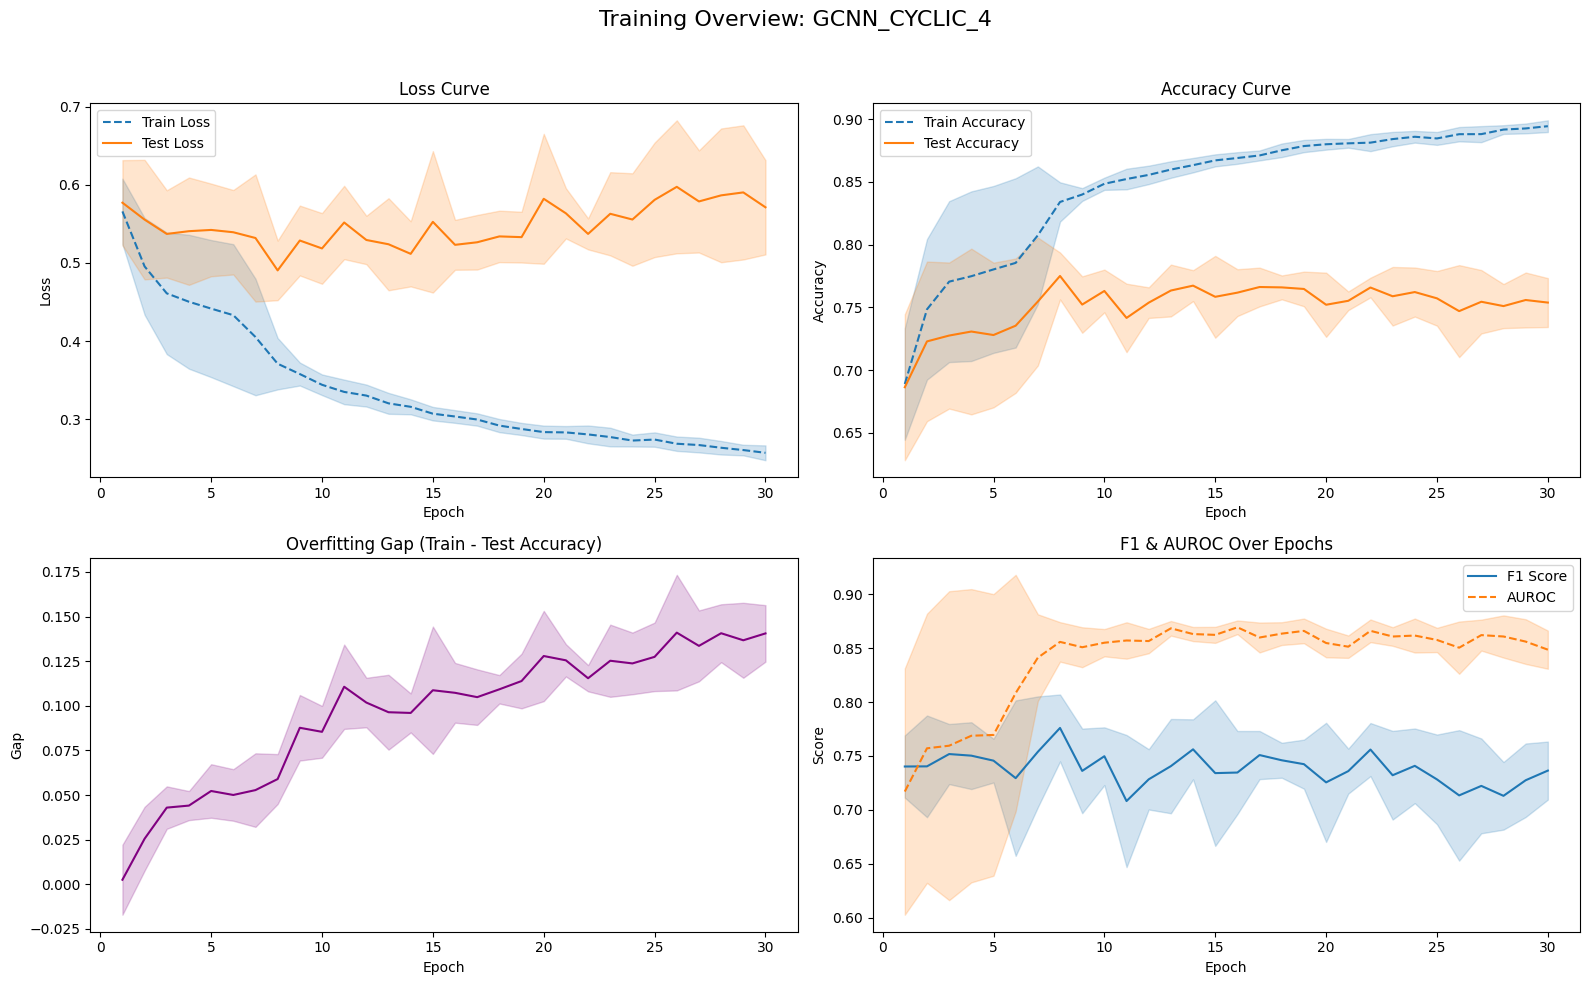

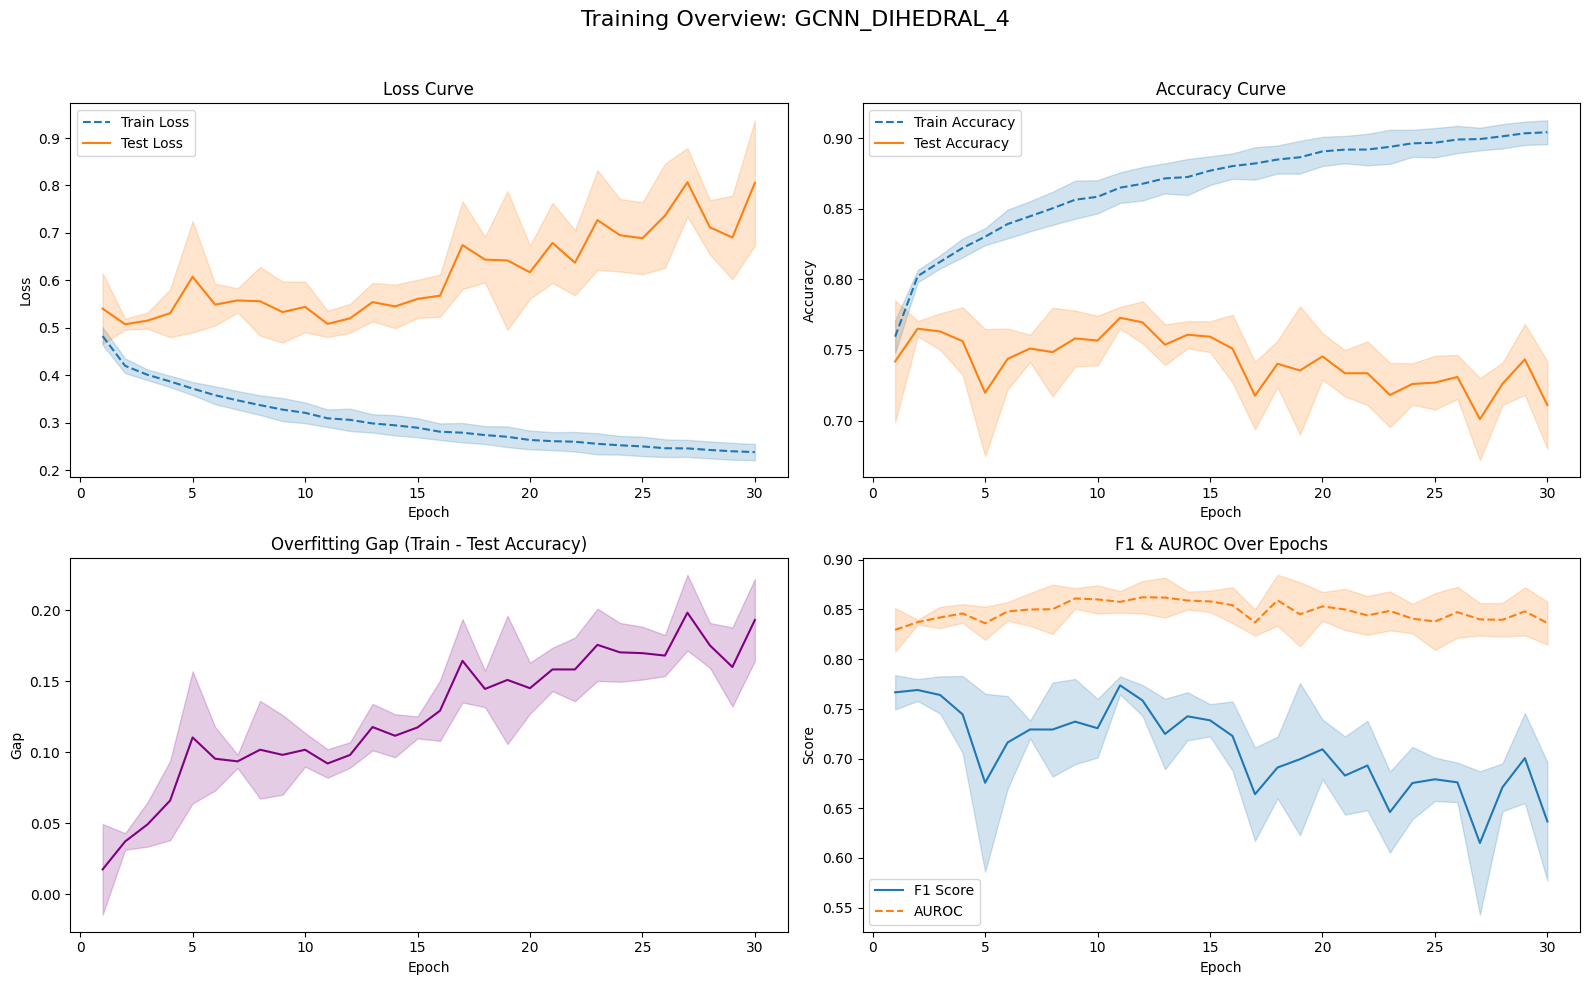

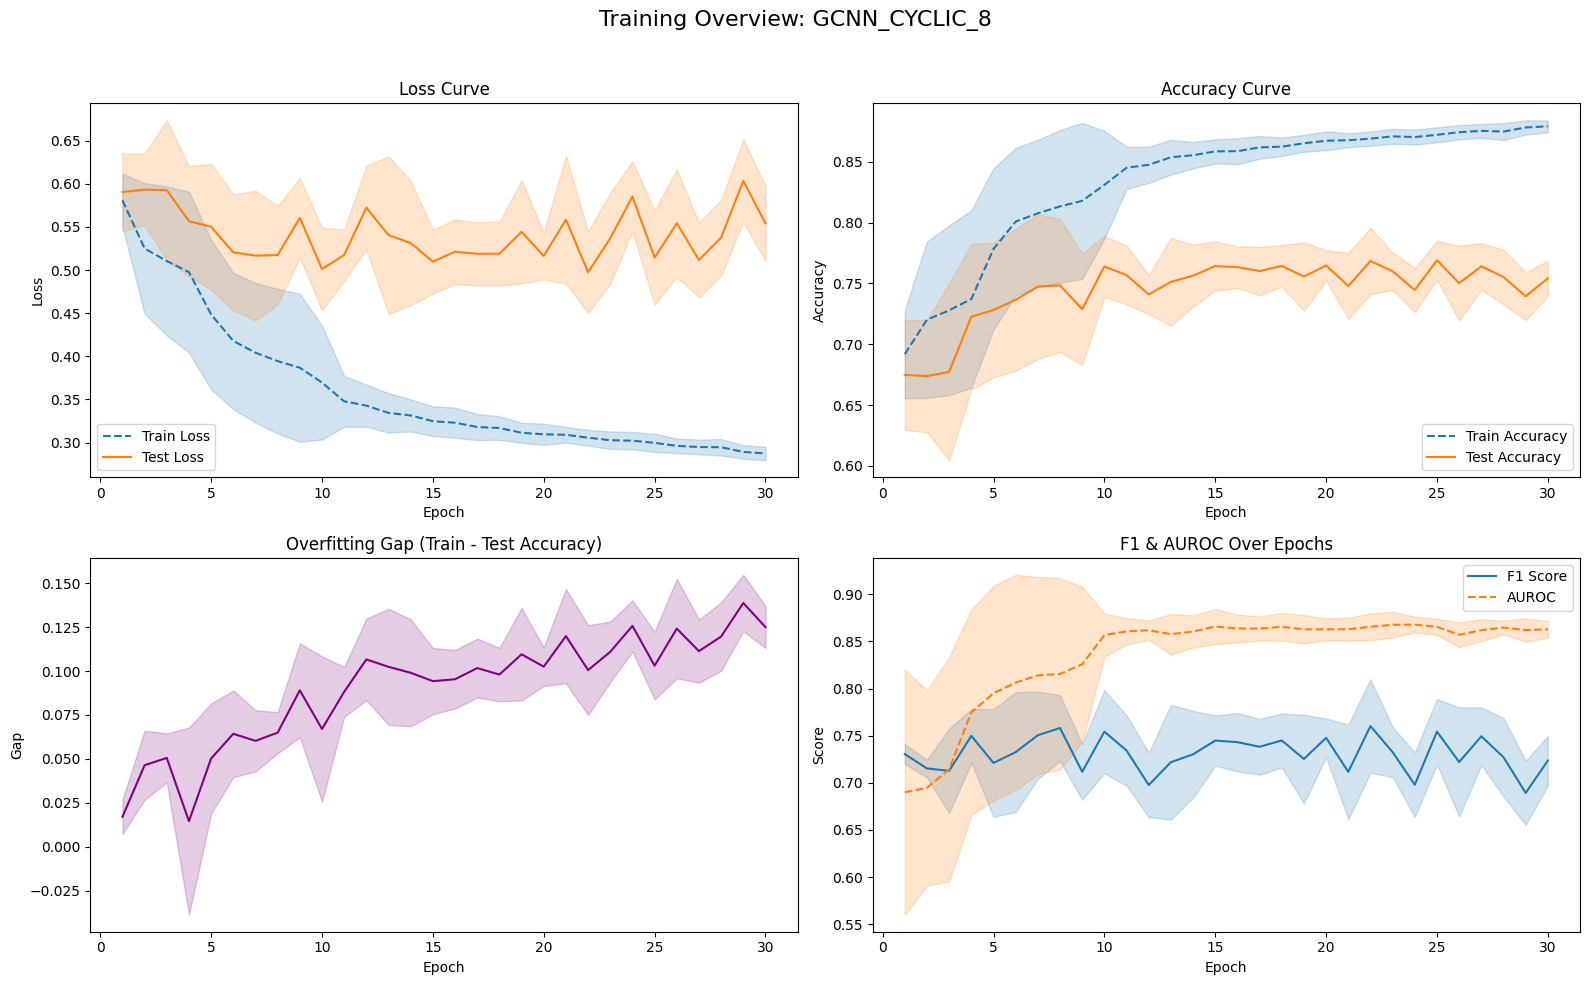

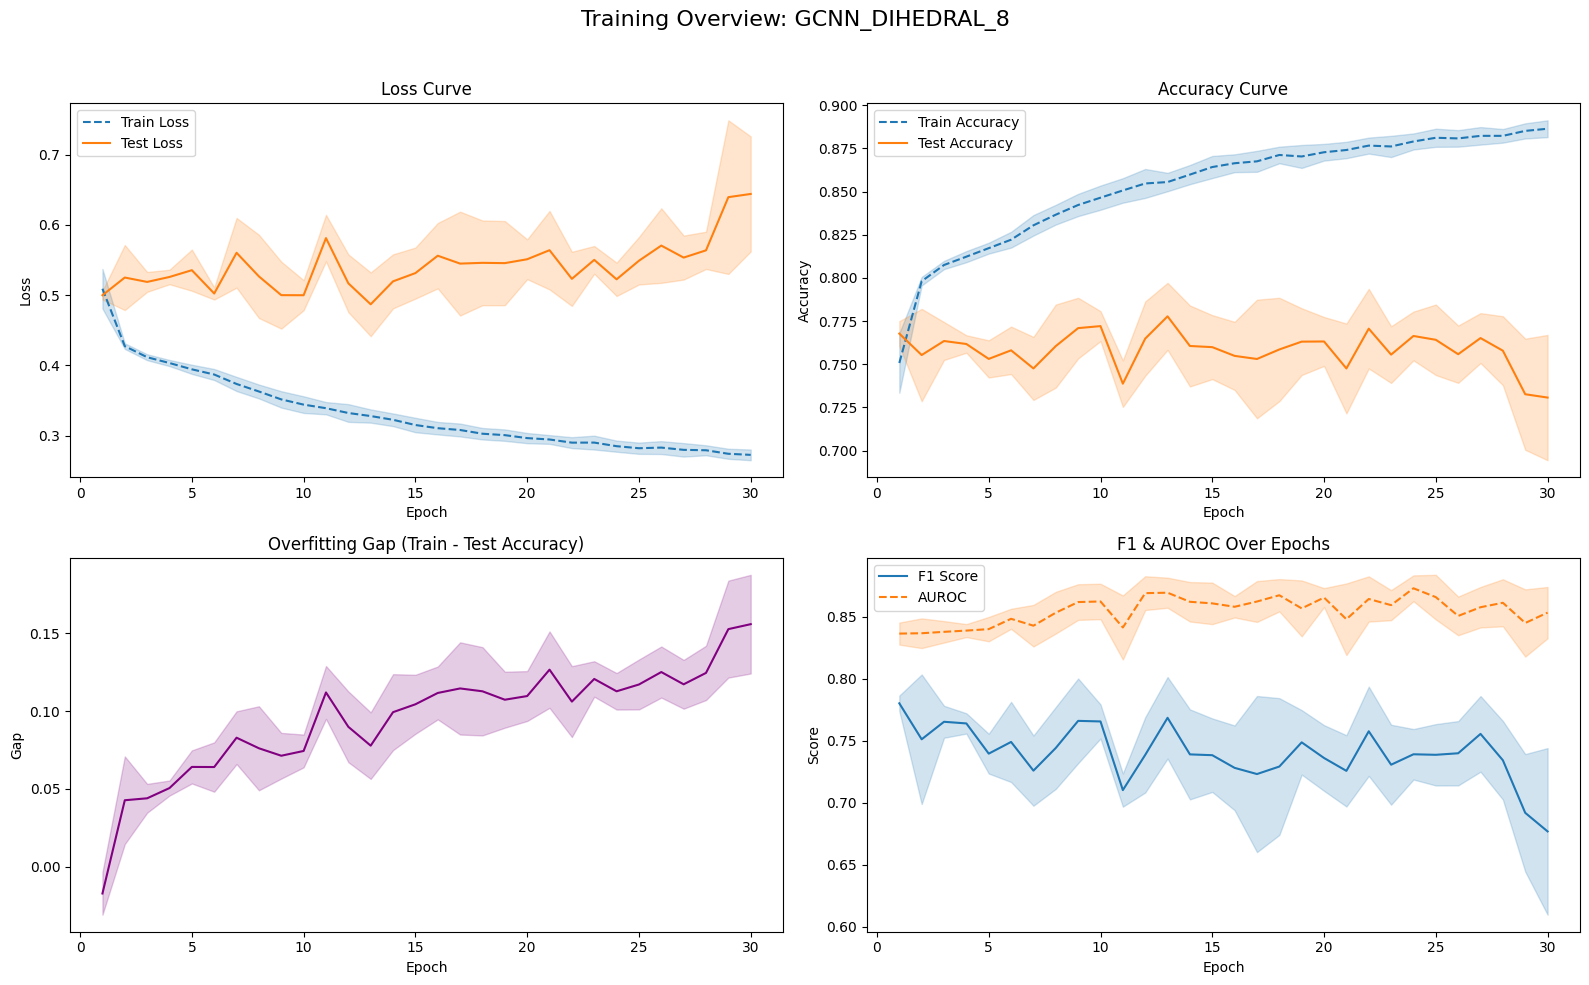

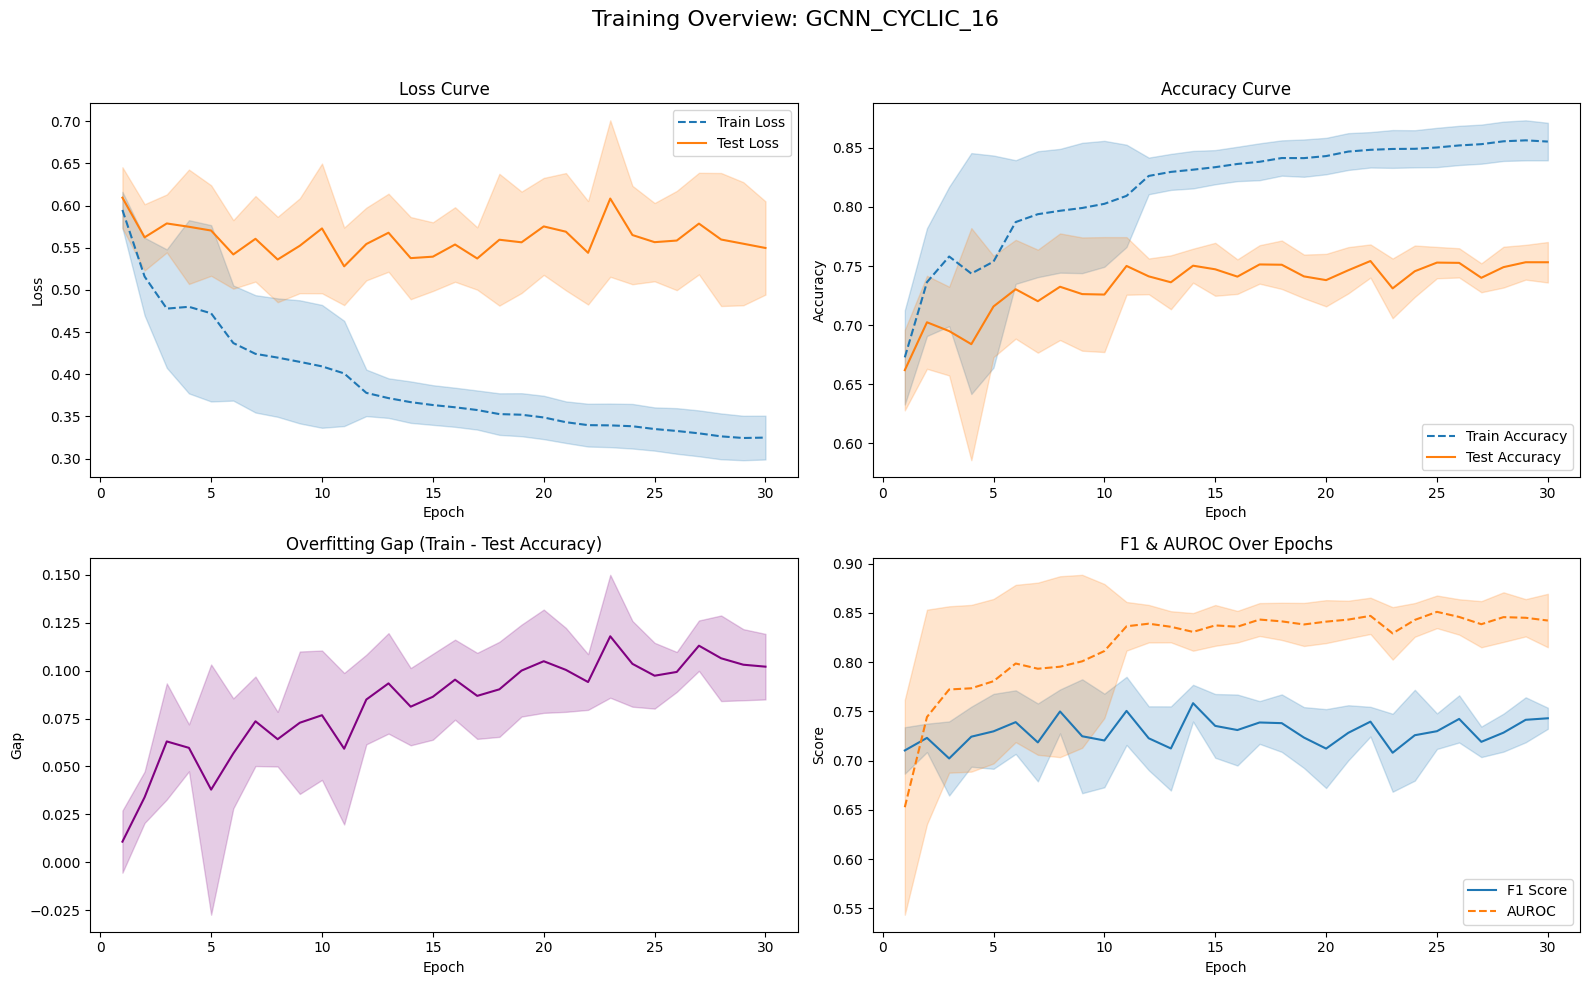

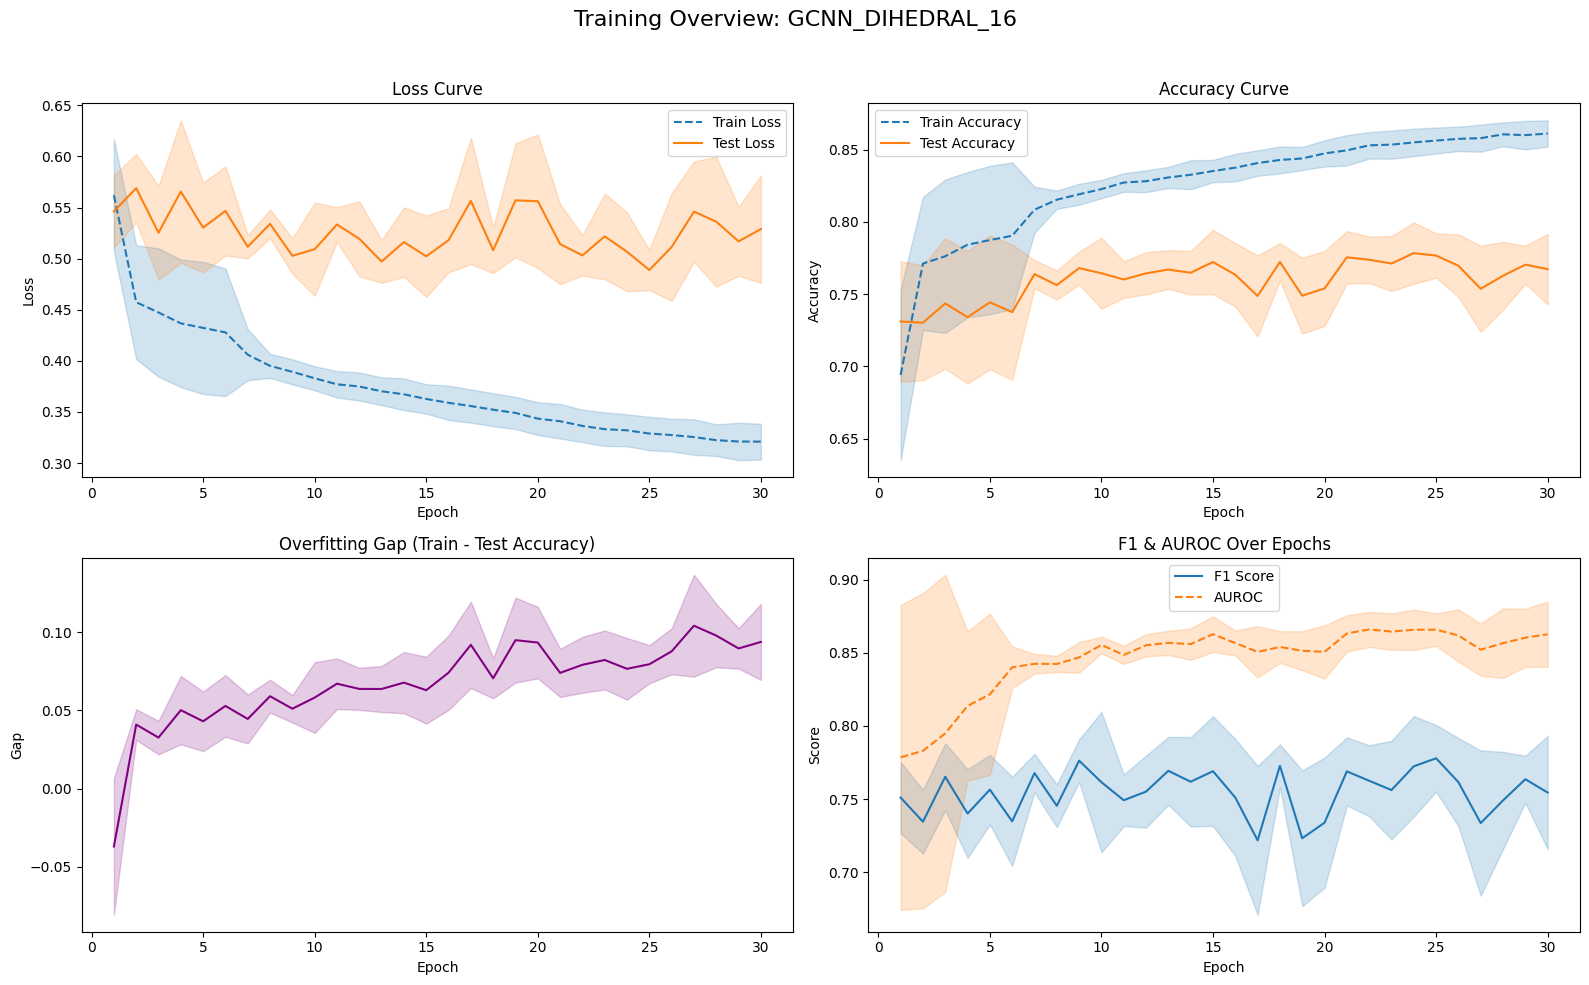

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
from scipy.stats import wilcoxon
import itertools
import os

# load data and create overfit gap
df = pd.read_csv("../results.csv")
df["Model"] = df["Model"].str.split("_Adam").str[0]
df["Overfit_Gap"] = df["Train_Acc"] - df["Test_Acc"]

# List of models
models = df["Model"].unique()

for model in models:
    model_df = df[df["Model"] == model]

    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    fig.suptitle(f"Training Overview: {model}", fontsize=16)

    # losses
    sns.lineplot(data=model_df, x="Epoch", y="Train_Loss", label="Train Loss", linestyle="--", ax=axes[0, 0], errorbar="sd")
    sns.lineplot(data=model_df, x="Epoch", y="Test_Loss", label="Test Loss", ax=axes[0, 0], errorbar="sd")
    axes[0, 0].set_title("Loss Curve")
    axes[0, 0].set_ylabel("Loss")
    axes[0, 0].legend()

    # plot accuracy Curves 
    sns.lineplot(data=model_df, x="Epoch", y="Train_Acc", label="Train Accuracy", linestyle="--", ax=axes[0, 1], errorbar="sd")
    sns.lineplot(data=model_df, x="Epoch", y="Test_Acc", label="Test Accuracy", ax=axes[0, 1], errorbar="sd")
    axes[0, 1].set_title("Accuracy Curve")
    axes[0, 1].set_ylabel("Accuracy")
    axes[0, 1].legend()

    # we plot the overfitting gap (Train - Test Accuracy)
    sns.lineplot(data=model_df, x="Epoch", y="Overfit_Gap", ax=axes[1, 0], color="purple", errorbar="sd")
    axes[1, 0].set_title("Overfitting Gap (Train - Test Accuracy)")
    axes[1, 0].set_ylabel("Gap")

    # F1 and AUROC
    sns.lineplot(data=model_df, x="Epoch", y="F1", label="F1 Score", ax=axes[1, 1], errorbar="sd")
    sns.lineplot(data=model_df, x="Epoch", y="AUROC", label="AUROC", linestyle="--", ax=axes[1, 1], errorbar="sd")
    axes[1, 1].set_title("F1 & AUROC Over Epochs")
    axes[1, 1].set_ylabel("Score")
    axes[1, 1].legend()

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


C:\Users\Christian\AppData\Local\Temp\ipykernel_32820\738787352.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x="Model", y="mean", palette="Blues_d")


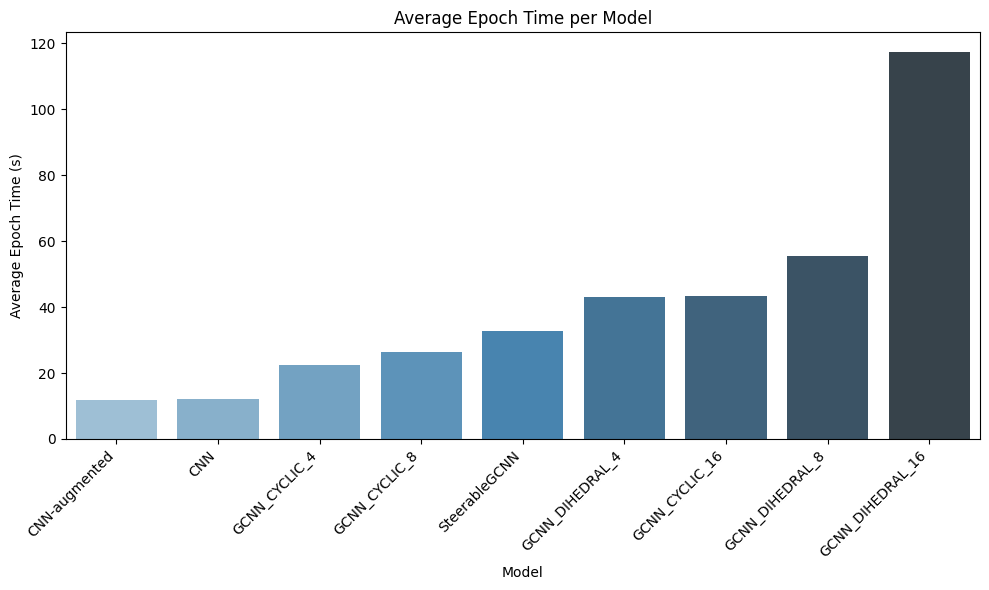

In [30]:
grouped = df.groupby("Model")["Epoch_time"].agg(["mean", "std"]).reset_index()
grouped = grouped.sort_values("mean", ascending=True)

# Plot med Seaborn (bruger 'errorbar' i stedet for 'yerr')
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x="Model", y="mean", palette="Blues_d")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Average Epoch Time (s)")
plt.title("Average Epoch Time per Model")
plt.tight_layout()
plt.show()

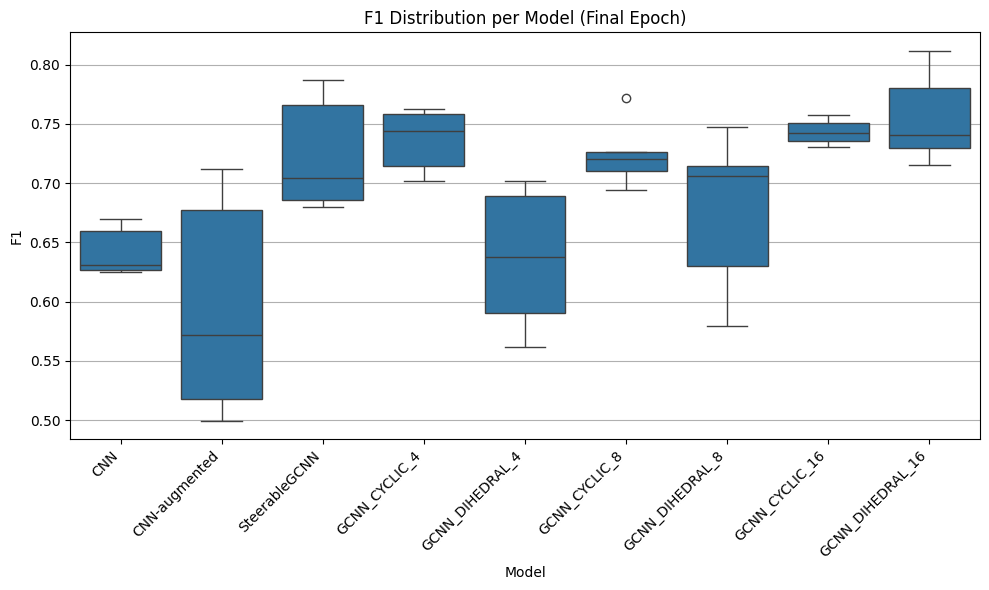

In [31]:
# Get only the final epoch per run
final_df = df[df["Epoch"] == df["Epoch"].max()]

# Choose metric to plot
metric = "F1"  # or "Test_Acc", "AUROC", etc.

# Plot all models in one boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=final_df, x="Model", y=metric)
plt.title(f"{metric} Distribution per Model (Final Epoch)")
plt.ylabel(metric)
plt.xlabel("Model")
plt.xticks(rotation=45, ha="right")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


['GCNN_DIHEDRAL_4.pt' 'GCNN_CYCLIC_4.pt' 'GCNN_CYCLIC_8.pt'
 'GCNN_DIHEDRAL_8.pt' 'SteerableGCNN.pt' 'CNN.pt' 'GCNN_DIHEDRAL_16.pt'
 'CNN-augmented.pt' 'GCNN_CYCLIC_16.pt']


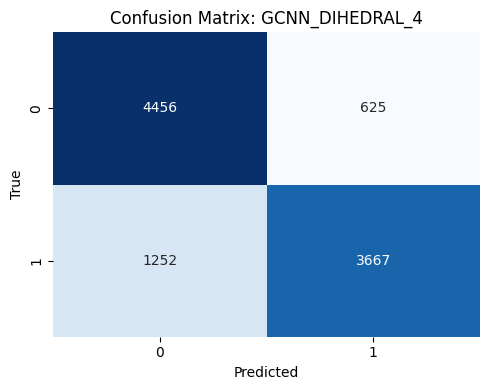

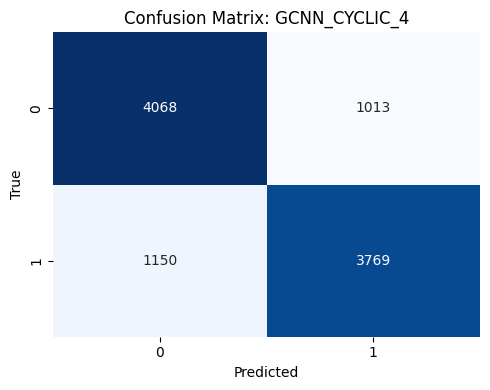

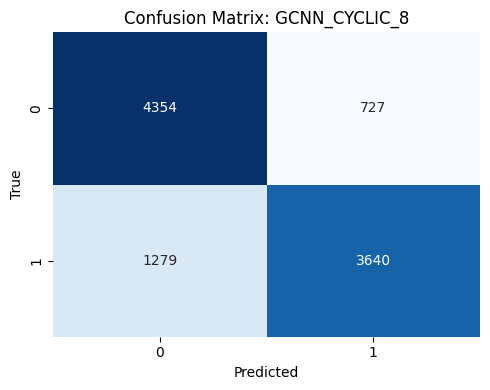

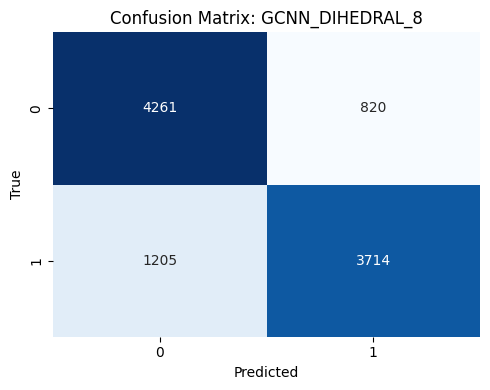

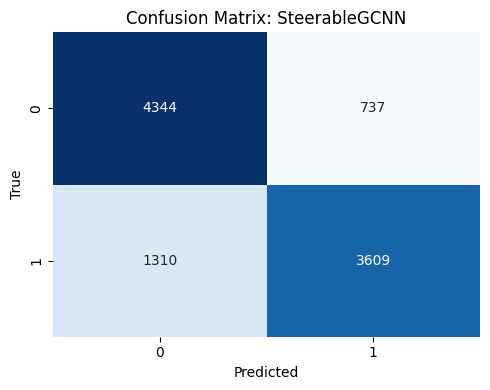

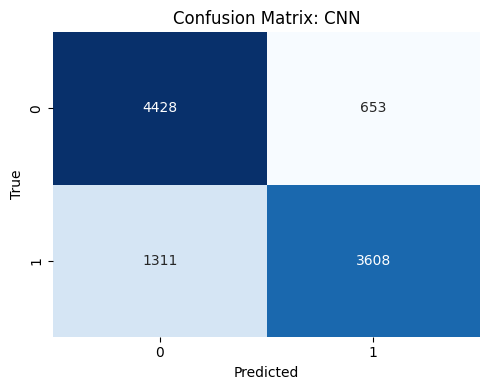

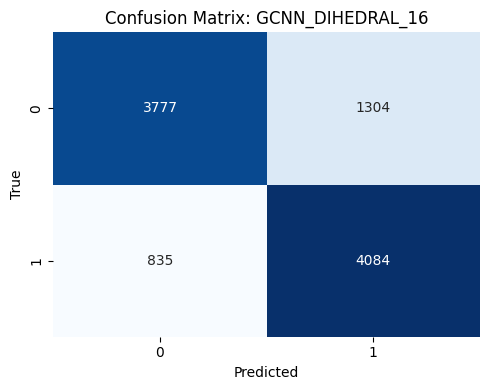

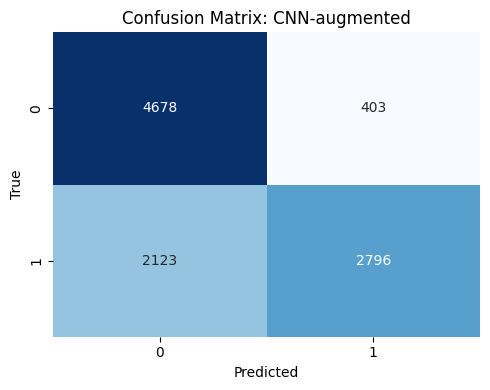

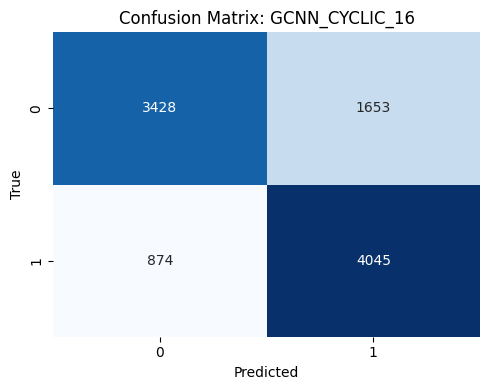

In [32]:
# Indlæs CSV med predictions og targets ind i en df
df = pd.read_csv("../confusion_results.csv")

# Hver række har: Model, Seed, Epoch, Preds, Targets
# Vi konverterer space-separated strenge til lister af ints så vi kan læse det
df["Preds"] = df["Preds"].apply(lambda x: list(map(int, x.split())))
df["Targets"] = df["Targets"].apply(lambda x: list(map(int, x.split())))

# Lav en confusion matrix per model
models = df["Model"].unique()
print(models)


for model in models:
    model_df = df[df["Model"] == model]
    preds = sum(model_df["Preds"].tolist(), [])
    targets = sum(model_df["Targets"].tolist(), [])

    cm = confusion_matrix(targets, preds)
    
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix: {model.replace(".pt", "")}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()


         Model 1          Model 2  p-value  Significant (<0.05)
 GCNN_DIHEDRAL_4    GCNN_CYCLIC_4   0.0284                 True
 GCNN_DIHEDRAL_4    GCNN_CYCLIC_8   0.0371                 True
 GCNN_DIHEDRAL_4  GCNN_DIHEDRAL_8   0.0273                 True
 GCNN_DIHEDRAL_4    SteerableGCNN   0.0020                 True
 GCNN_DIHEDRAL_4              CNN   0.0137                 True
 GCNN_DIHEDRAL_4 GCNN_DIHEDRAL_16   0.3223                False
 GCNN_DIHEDRAL_4    CNN-augmented   0.0020                 True
 GCNN_DIHEDRAL_4   GCNN_CYCLIC_16   0.0020                 True
   GCNN_CYCLIC_4    GCNN_CYCLIC_8   0.1934                False
   GCNN_CYCLIC_4  GCNN_DIHEDRAL_8   0.1602                False
   GCNN_CYCLIC_4    SteerableGCNN   0.6953                False
   GCNN_CYCLIC_4              CNN   0.1309                False
   GCNN_CYCLIC_4 GCNN_DIHEDRAL_16   0.0039                 True
   GCNN_CYCLIC_4    CNN-augmented   0.0020                 True
   GCNN_CYCLIC_4   GCNN_CYCLIC_16   0.02

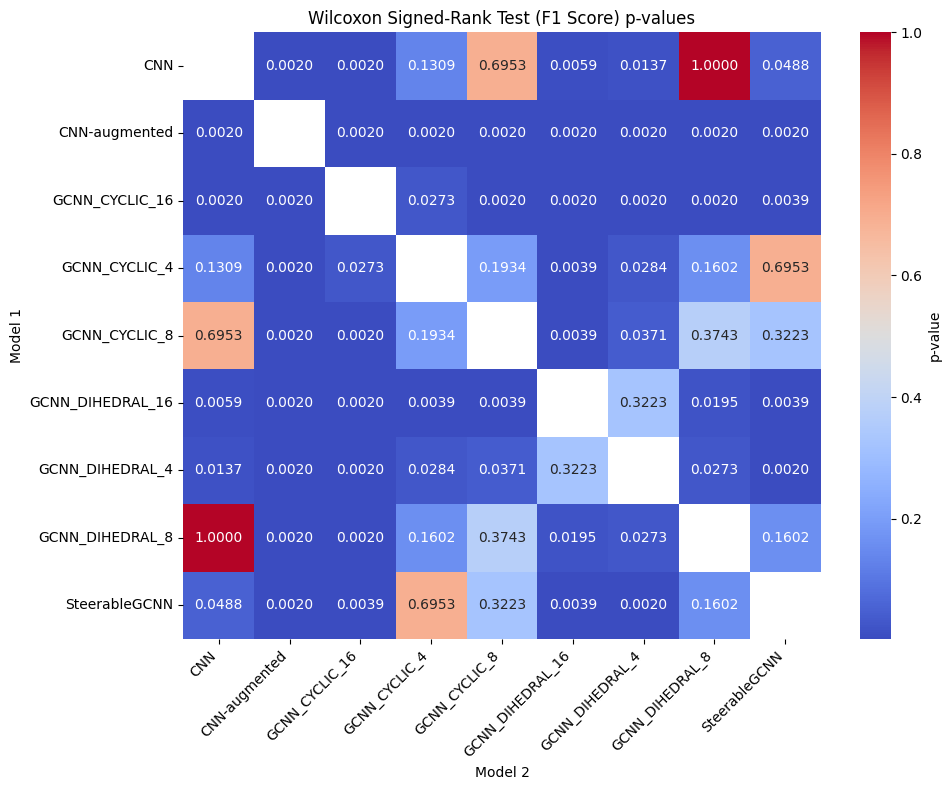

In [33]:
# Load our results from cross validation
df = pd.read_csv("../confusion_results.csv")
df["Model"] = df["Model"].str.replace(".pt", "", regex=False)

# Ensure we have correct sorting of F1 values per fold
def get_metric_sorted(model, metric="F1"):
    return df[df["Model"] == model].sort_values("Fold")[metric].values

# Get all unique models
models = df["Model"].unique()

# Compare all model pairs using Wilcoxon test on F1 score
results = []

for model1, model2 in itertools.combinations(models, 2):
    f1_1 = get_metric_sorted(model1, metric="F1")
    f1_2 = get_metric_sorted(model2, metric="F1")

    if len(f1_1) == len(f1_2):
        try:
            stat, p = wilcoxon(f1_1, f1_2)
        except ValueError:
            p = float('nan')

        results.append({
            "Model 1": model1,
            "Model 2": model2,
            "p-value": round(p, 4),
            "Significant (<0.05)": p < 0.05
        })

# Display results
result_df = pd.DataFrame(results)
print(result_df.to_string(index=False))

import matplotlib.pyplot as plt
import seaborn as sns


# Pivot the p-values into a matrix
pivot_df = result_df.pivot(index="Model 1", columns="Model 2", values="p-value")

# Fill in the symmetric part
all_models = sorted(set(result_df["Model 1"]) | set(result_df["Model 2"]))
pivot_df = pivot_df.reindex(index=all_models, columns=all_models)
for i in all_models:
    for j in all_models:
        if pd.isna(pivot_df.loc[i, j]) and not pd.isna(pivot_df.loc[j, i]):
            pivot_df.loc[i, j] = pivot_df.loc[j, i]

# Convert to numeric matrix
p_matrix = pivot_df.astype(float)

plt.figure(figsize=(10, 8))
sns.heatmap(p_matrix, annot=True, fmt=".4f", cmap="coolwarm", cbar_kws={'label': 'p-value'})
plt.title("Wilcoxon Signed-Rank Test (F1 Score) p-values")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



In [34]:
# for summarizing results of our models in cross validation
summary = df.groupby("Model")[["Accuracy", "F1", "AUROC", "LogLoss"]].agg(['mean', 'std'])
summary.columns = [f"{m}_{stat}" for m, stat in summary.columns]
summary.reset_index(inplace=True)

# Round for display
summary = summary.round(4)
print(summary)

summary_latex = summary.copy()
for col in ['Accuracy', 'F1', 'AUROC', 'LogLoss']:
    summary_latex[f"{col}_summary"] = summary_latex[f"{col}_mean"].astype(str) + " ± " + summary_latex[f"{col}_std"].astype(str)

latex_table = summary_latex[["Model", "Accuracy_summary", "F1_summary", "AUROC_summary", "LogLoss_summary"]]
print(latex_table.to_latex(index=False, escape=False))

              Model  Accuracy_mean  Accuracy_std  F1_mean  F1_std  AUROC_mean  \
0               CNN         0.8036        0.0083   0.7860  0.0091      0.8861   
1     CNN-augmented         0.7474        0.0106   0.6888  0.0136      0.8548   
2    GCNN_CYCLIC_16         0.7473        0.0148   0.7619  0.0150      0.8410   
3     GCNN_CYCLIC_4         0.7837        0.0150   0.7770  0.0146      0.8636   
4     GCNN_CYCLIC_8         0.7994        0.0113   0.7838  0.0139      0.8820   
5  GCNN_DIHEDRAL_16         0.7861        0.0081   0.7924  0.0095      0.8699   
6   GCNN_DIHEDRAL_4         0.8123        0.0127   0.7962  0.0133      0.8954   
7   GCNN_DIHEDRAL_8         0.7975        0.0111   0.7857  0.0135      0.8800   
8     SteerableGCNN         0.7953        0.0133   0.7790  0.0146      0.8781   

   AUROC_std  LogLoss_mean  LogLoss_std  
0     0.0145        0.5169       0.0477  
1     0.0119        0.7598       0.0479  
2     0.0098        0.5220       0.0182  
3     0.0135        0

C:\Users\Christian\AppData\Local\Temp\ipykernel_32820\3346853993.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("viridis")


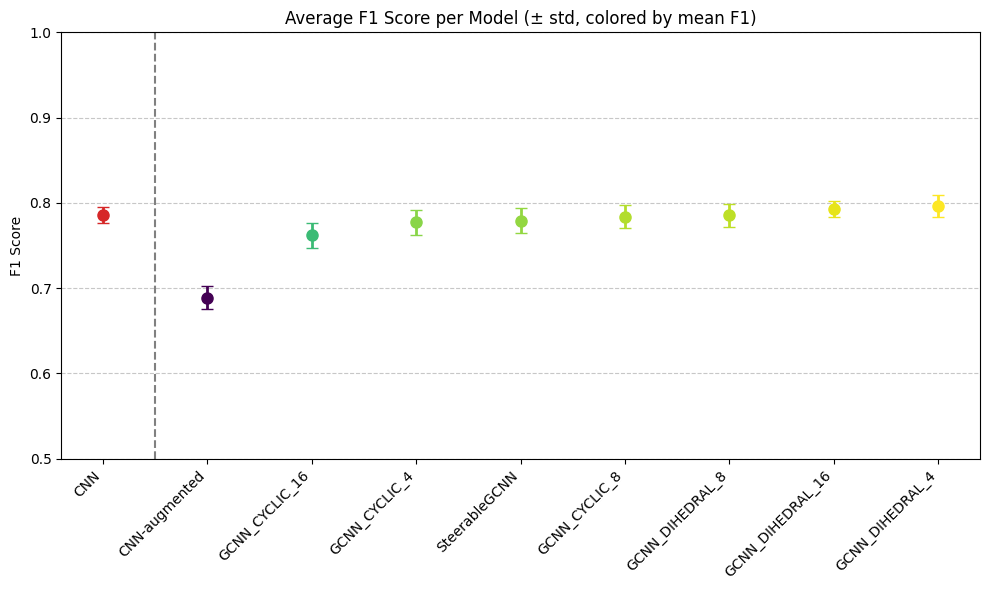

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Load results
df = pd.read_csv("../confusion_results.csv")
df["Model"] = df["Model"].str.replace(".pt", "", regex=False)

# Mean ± std F1 per model
f1_summary = df.groupby("Model")["F1"].agg(["mean", "std"]).reset_index()

baseline = "CNN"

# Sort: baseline first, others by descending mean F1
f1_summary["sort_key"] = f1_summary["Model"].apply(
    lambda x: f"0_{x}" if x == baseline else f"1_{-f1_summary.loc[f1_summary['Model']==x,'mean'].values[0]:.4f}_{x}"
)
f1_summary = f1_summary.sort_values("sort_key").drop(columns="sort_key")

# Normalise mean F1 to [0,1] for colormap
norm = mcolors.Normalize(vmin=f1_summary["mean"].min(), vmax=f1_summary["mean"].max())
cmap = cm.get_cmap("viridis")

plt.figure(figsize=(10, 6))

for i, row in enumerate(f1_summary.itertuples()):
    color = "tab:red" if row.Model == baseline else cmap(norm(row.mean))
    plt.errorbar(
        x=i,
        y=row.mean,
        yerr=row.std,
        fmt="o",
        capsize=4,
        color=color,
        markersize=8,
        linewidth=2,
    )

# Separator after baseline
plt.axvline(x=0.5, color="gray", linestyle="--")

# Cosmetic tweaks
plt.xticks(range(len(f1_summary)), f1_summary["Model"], rotation=45, ha="right")
plt.ylabel("F1 Score")
plt.title("Average F1 Score per Model (± std, colored by mean F1)")
plt.ylim(0.5, 1.0)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Add a colorbar (excluding the baseline marker)
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

plt.tight_layout()
plt.show()


Test label distribution: tensor([20, 12])


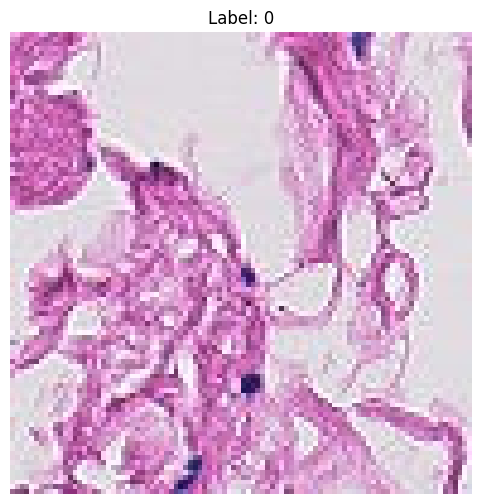

In [36]:
from data import load_pcam_subset_for_final_testing


test_loader = load_pcam_subset_for_final_testing(0, 32, r"../data/raw/", normalize=False)
# Get the 123rd sample directly from the dataset
imgs, labels = next(iter(test_loader))

# Pick one sample from the batch (e.g., index 0)
img = imgs[0] / 255      # shape: [3, 96, 96]
label = labels[0]    # shape: []

# Convert [C, H, W] to [H, W, C] for matplotlib
img = img.permute(1, 2, 0)

# Plot
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.title(f'Label: {label.item()}')
plt.axis('off')
plt.show()

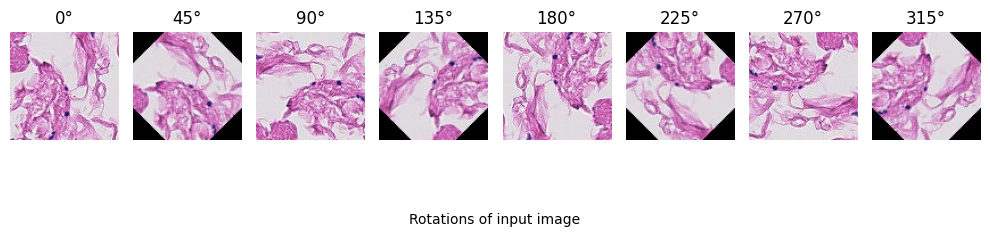

In [37]:
import torch
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 3]

rots = torch.linspace(0, 360 - 360 / 8, 8)

# Fix tensor shape if needed
if isinstance(img, torch.Tensor) and img.ndim == 3:
    if img.shape[0] not in [1, 3]:  # Probably HWC, fix to CHW
        img = img.permute(2, 0, 1)

# Convert to PIL
to_pil = transforms.ToPILImage()
to_tensor = transforms.ToTensor()
pil_img = to_pil(img)

# Rotate and convert back
rot_digit = torch.stack([
    to_tensor(
        torchvision.transforms.functional.rotate(
            pil_img, angle.item(), interpolation=transforms.InterpolationMode.BILINEAR
        )
    )
    for angle in rots
])

# Plot
fig, ax = plt.subplots(1, len(rots))

for idx in range(len(rots)):
    rotated = rot_digit[idx].permute(1, 2, 0)  # CHW → HWC
    ax[idx].imshow(rotated)
    ax[idx].set_title(f"{int(rots[idx])}°")
    ax[idx].axis('off')

fig.text(0.5, 0.04, 'Rotations of input image', ha='center')
plt.tight_layout()
plt.show()


CNN-augmented.pt


C:\Users\Christian\AppData\Local\Temp\ipykernel_32820\2280908537.py:92: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_instance.load_state_dict(torch.load(model_path, m

<Figure size 1000x300 with 0 Axes>

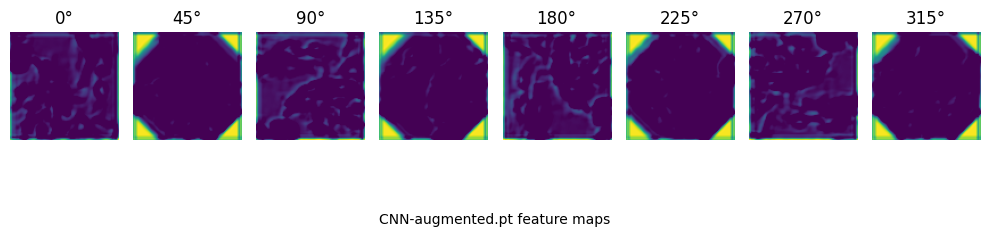

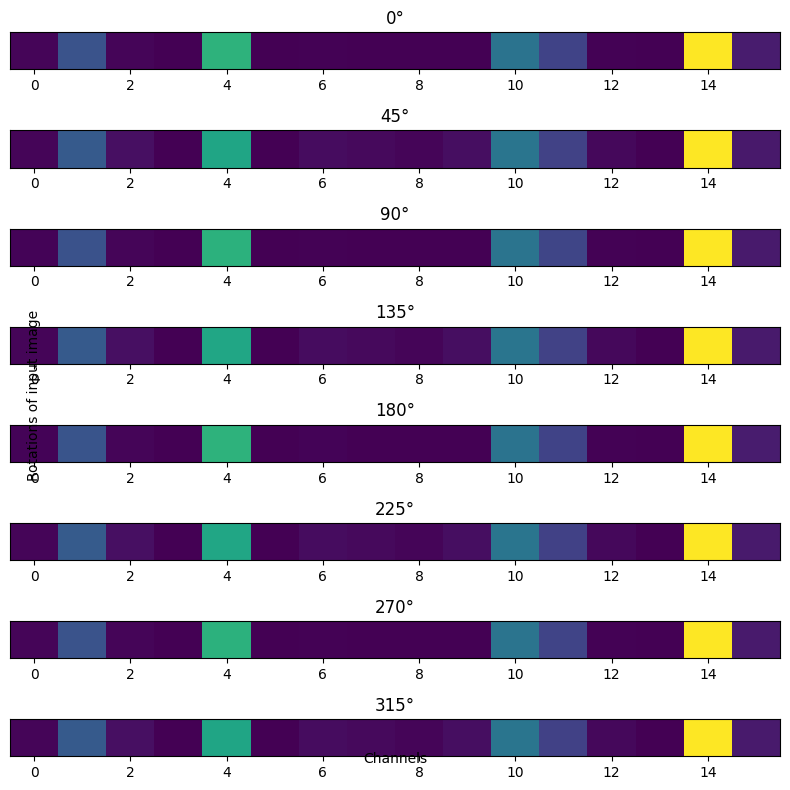

CNN.pt


<Figure size 1000x300 with 0 Axes>

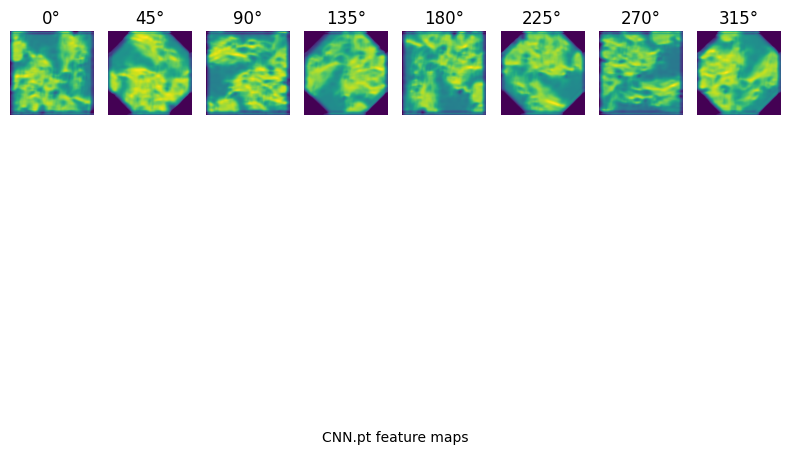

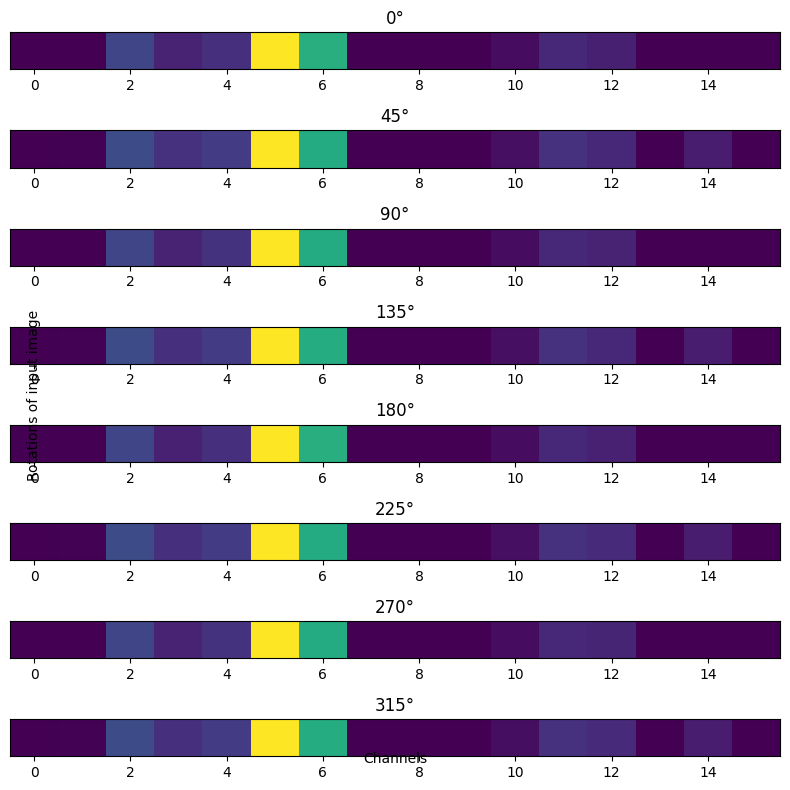

GCNN_CYCLIC_16.pt


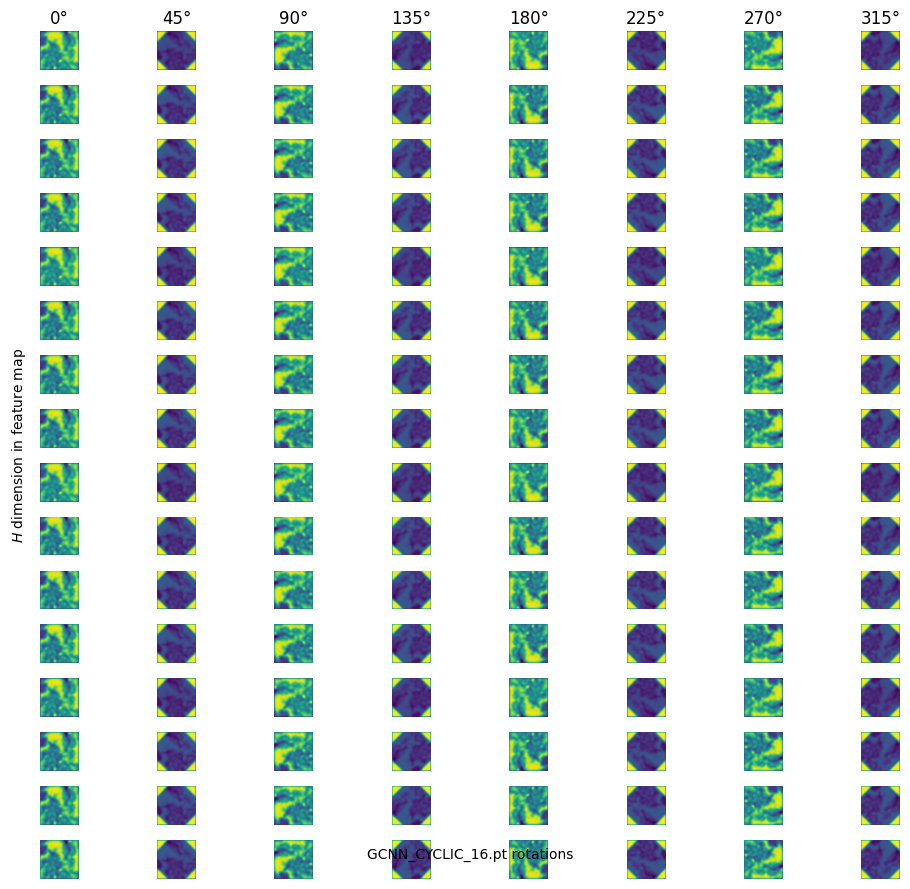

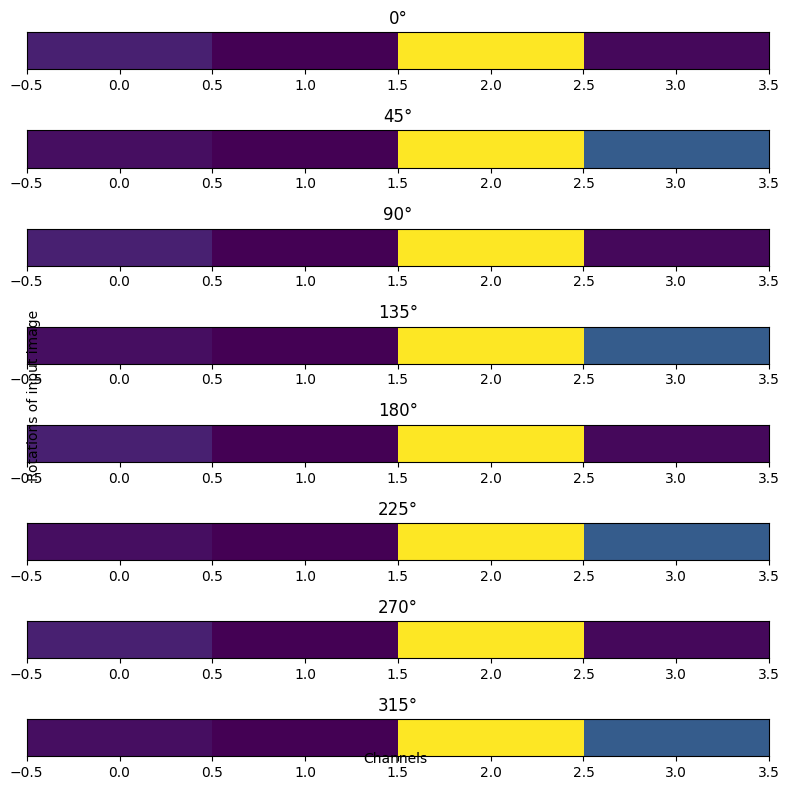

GCNN_CYCLIC_4.pt


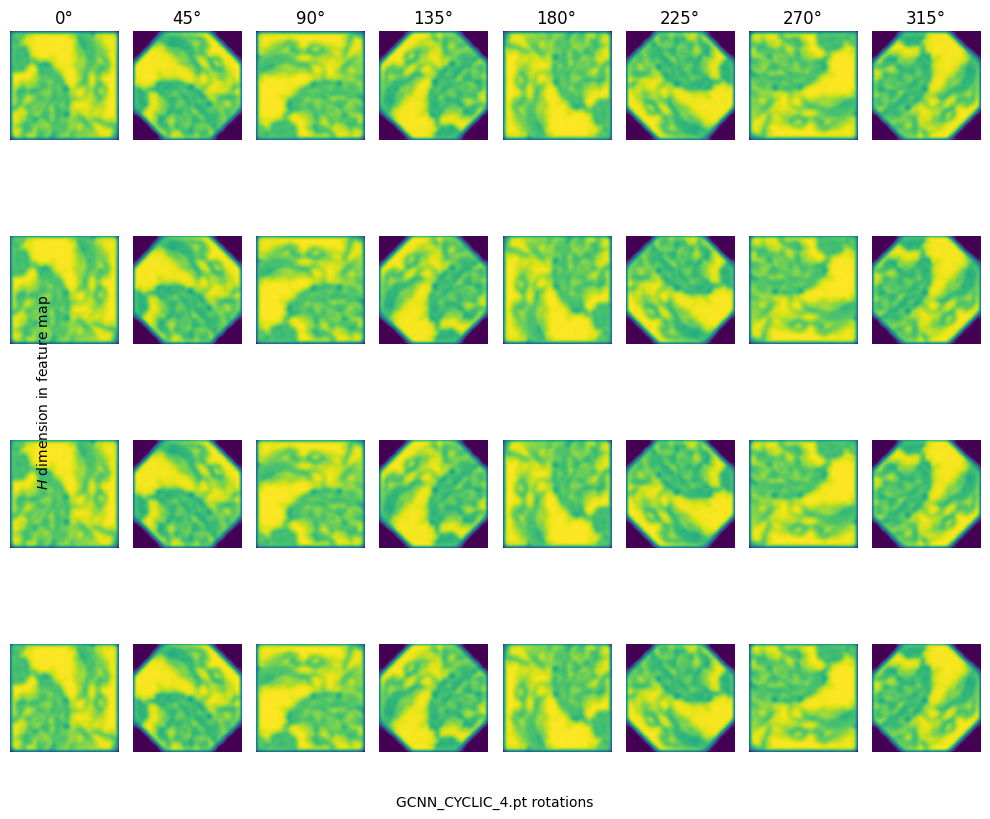

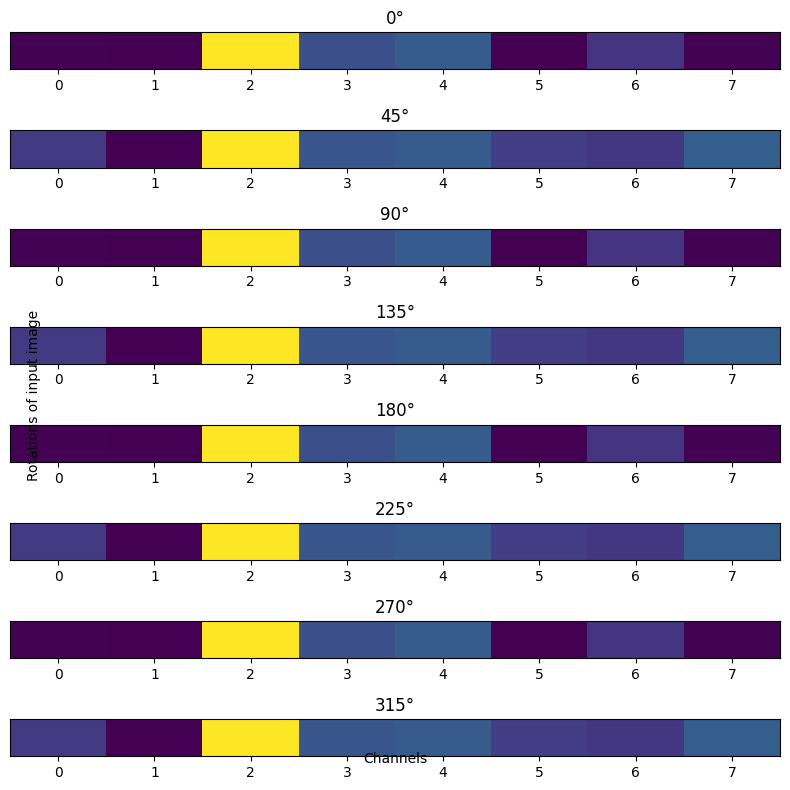

GCNN_CYCLIC_8.pt


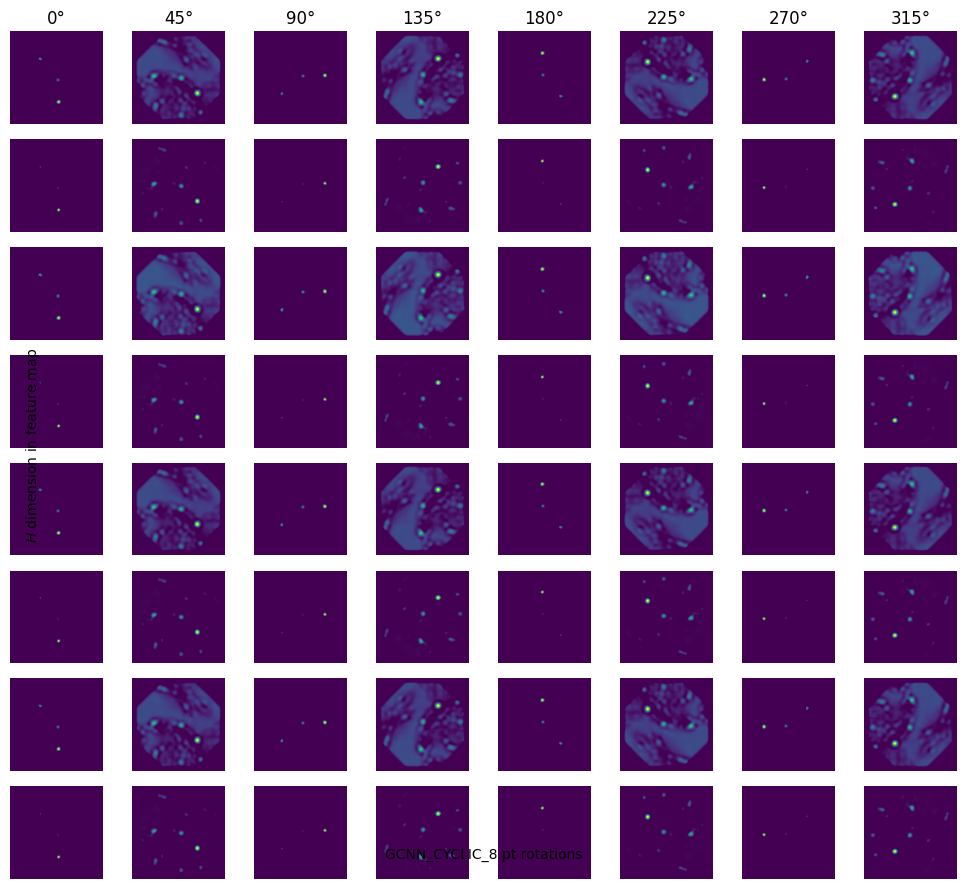

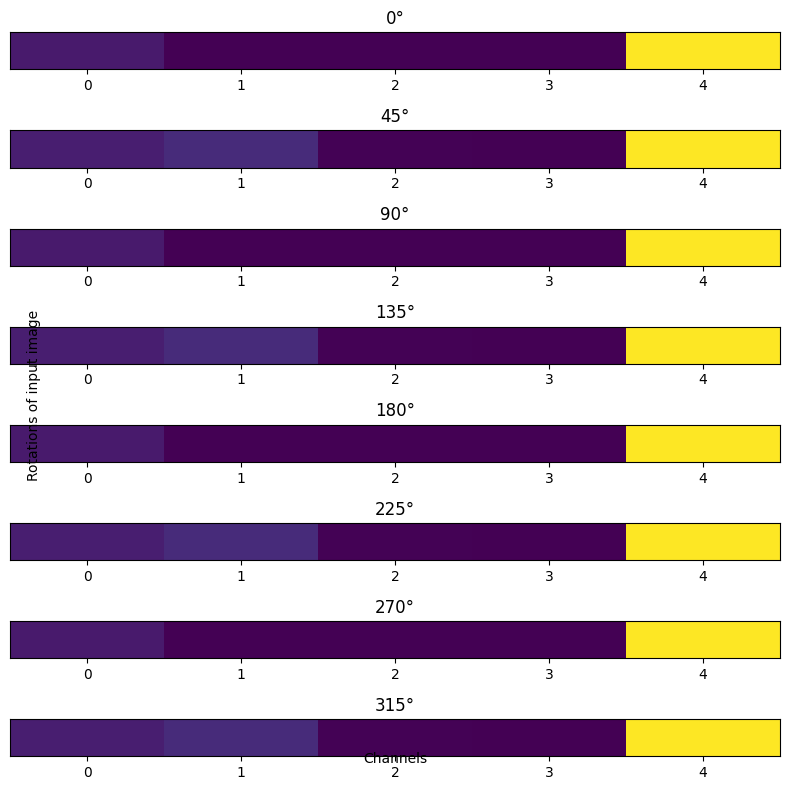

GCNN_DIHEDRAL_16.pt


C:\Users\Christian\AppData\Local\Temp\ipykernel_32820\2280908537.py:62: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(model_path, map_location=device

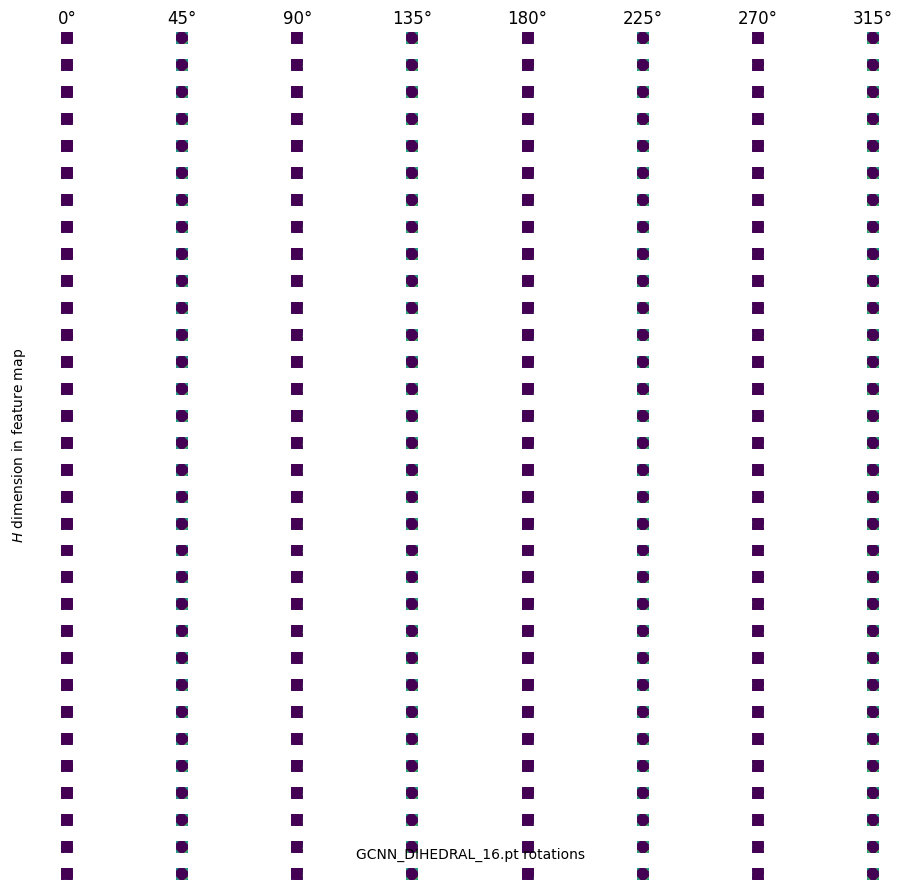

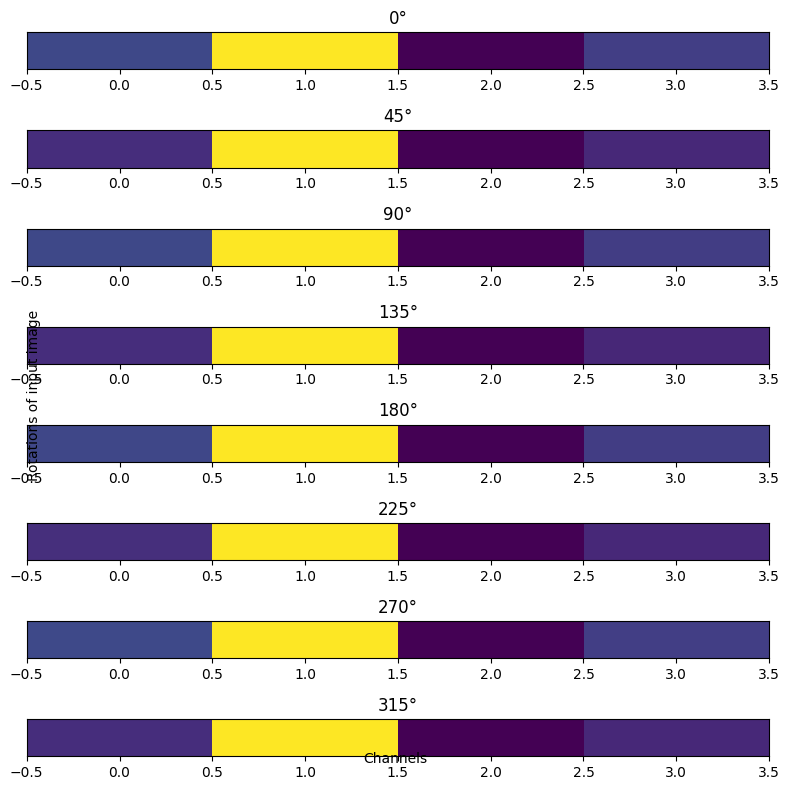

GCNN_DIHEDRAL_4.pt


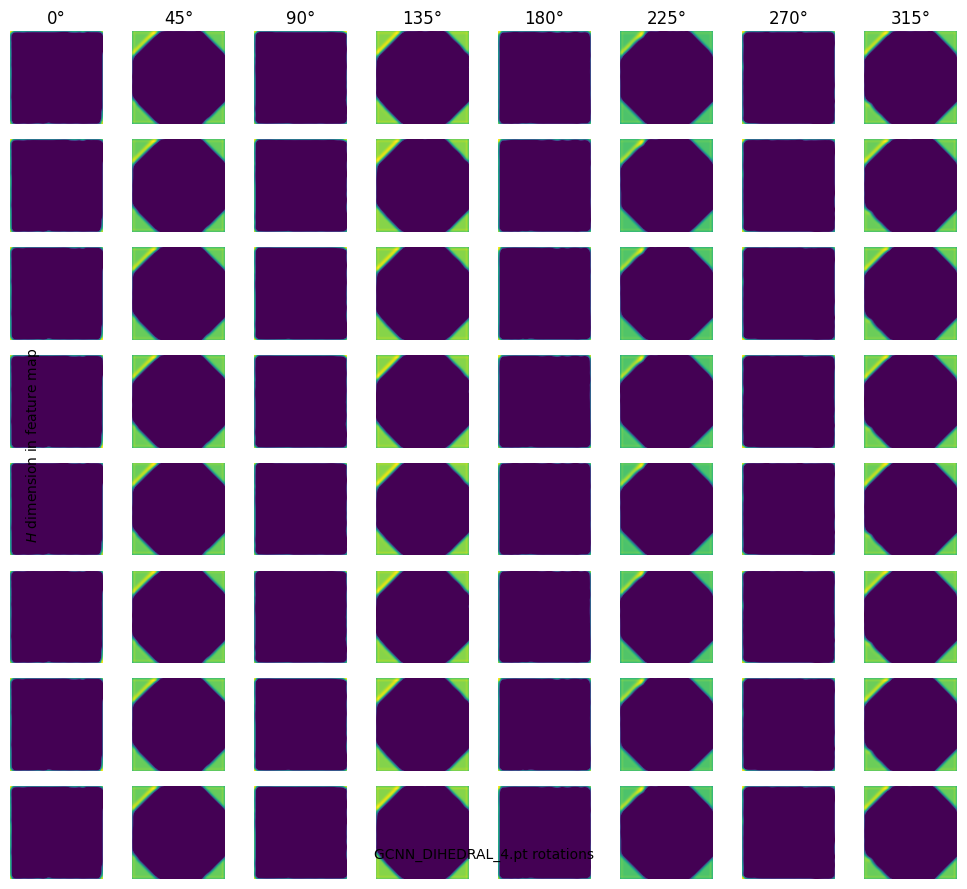

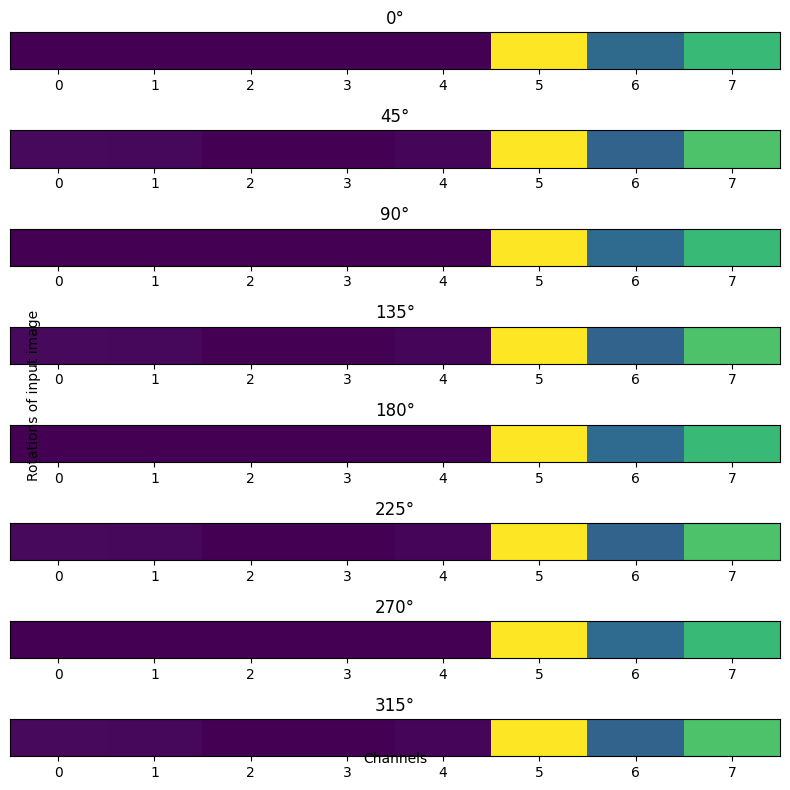

GCNN_DIHEDRAL_8.pt


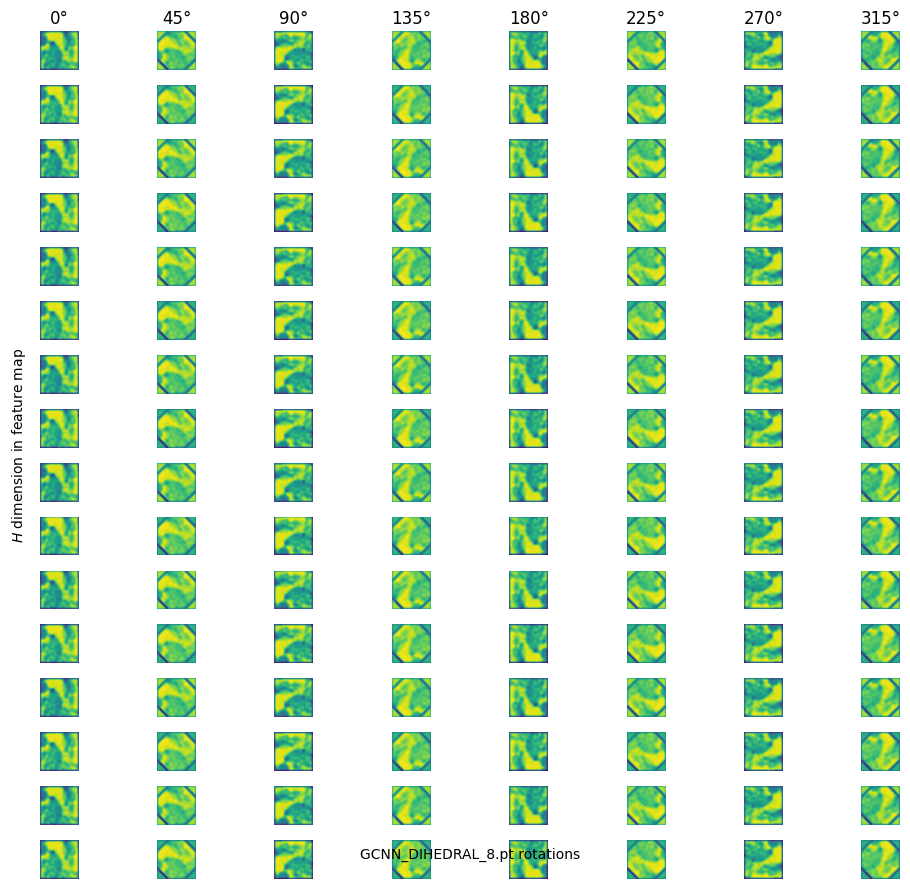

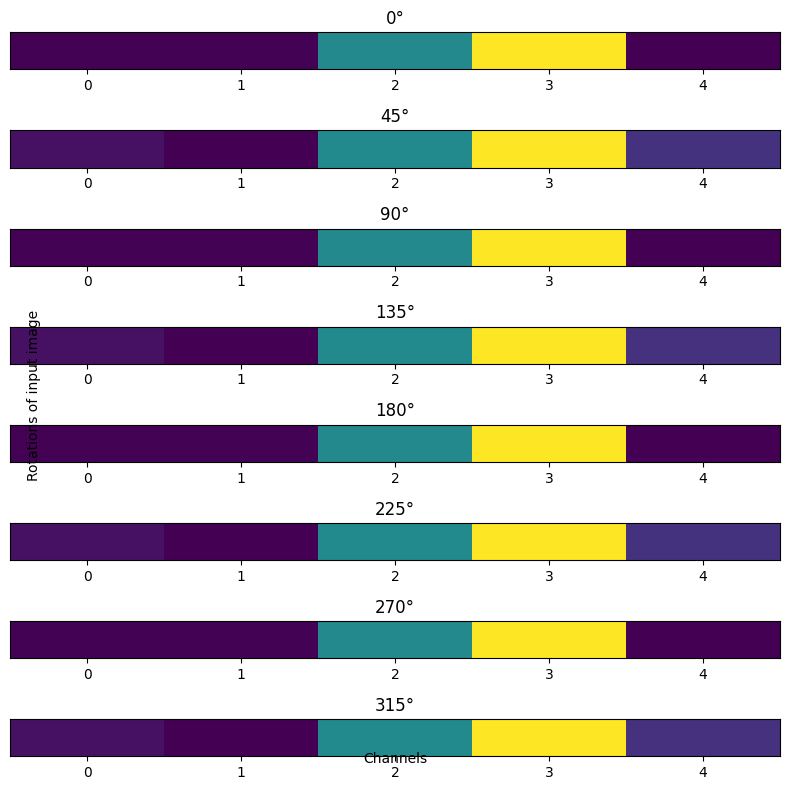

SteerableGCNN.pt
Unknown model type for: SteerableGCNN.pt


In [53]:
from MODELS import GECNN, CNN
from subfiles.groups import CyclicGroup, DihedralGroup
import numpy as np
import os
import torch.nn.functional as F

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_dir = "../models"
model_files = [f for f in os.listdir(model_dir) if f.endswith(".pt")]

# GENERAL
IN_CHANNELS = 3
OUT_CHANNELS = 2
KERNEL_SIZE = 5

# CNN
CNN_NUM_HIDDEN = 4
CNN_HIDDEN_CHANNELS = 16

# STEERABLE
STEERABLE_NUM_HIDDEN = 4
BASE_GROUP_ORDER = 4
cyclic_group = CyclicGroup(n=BASE_GROUP_ORDER).to(device)
num_elements = cyclic_group.elements().numel()
HIDDEN_CHANNELS = round(CNN_HIDDEN_CHANNELS/np.log2(num_elements))

# GCNN
GCNN_NUM_HIDDEN = 4

for model in model_files:
    model_name = model.replace("-pretrained.pt", "")
    model_path = os.path.join(model_dir, model)

    print(model_name)

    # Instantiate model based on name
    if "CNN" in model_name and "GCNN" not in model_name:
        model_instance = CNN(
            in_channels=IN_CHANNELS,
            out_channels=OUT_CHANNELS,
            kernel_size=KERNEL_SIZE,
            num_hidden=CNN_NUM_HIDDEN,
            hidden_channels=CNN_HIDDEN_CHANNELS
        ).to(device)

    elif "GCNN_CYCLIC" in model_name:
        n = int(model_name.split("_")[2].replace(".pt", ""))
        group = CyclicGroup(n=n).to(device)
        hidden_channels = round(CNN_HIDDEN_CHANNELS / np.log2(group.elements().numel()))
        model_instance = GECNN(
            in_channels=IN_CHANNELS,
            out_channels=OUT_CHANNELS,
            kernel_size=KERNEL_SIZE,
            num_hidden=GCNN_NUM_HIDDEN,
            hidden_channels=hidden_channels,
            group=group
        ).to(device)

    elif "GCNN_DIHEDRAL" in model_name:
        n = int(model_name.split("_")[2].replace(".pt", ""))
        group = DihedralGroup(n=n).to(device)
        state_dict = torch.load(model_path, map_location=device)
        hidden_channels = state_dict["lifting_conv.bias"].shape[0]
        model_instance = GECNN(
            in_channels=IN_CHANNELS,
            out_channels=OUT_CHANNELS,
            kernel_size=KERNEL_SIZE,
            num_hidden=GCNN_NUM_HIDDEN,
            hidden_channels=hidden_channels,
            group=group
        ).to(device)

        """
        elif "SteerableGCNN" in model_name:
            state_dict = torch.load(model_path, map_location=device)
            hidden_channels_steerable = state_dict["classifier.weight"].shape[1]
            model_instance = SteerableGCNN(
                in_channels=IN_CHANNELS,
                out_channels=OUT_CHANNELS,
                kernel_size=KERNEL_SIZE,
                num_hidden=STEERABLE_NUM_HIDDEN,
                hidden_channels=hidden_channels_steerable
            ).to(device)
        """


    else:
        print(f"Unknown model type for: {model_name}")
        continue

    # Load pretrained weights
    model_instance.load_state_dict(torch.load(model_path, map_location=device))
    model_instance.eval()
    rot_digit = rot_digit.to(device)

    with torch.no_grad():
        if "CNN" in model_name and "GCNN" not in model_name:
            # Assuming CNN has attributes: first_conv, convs
            cnn_out = model_instance.first_conv(rot_digit)
            cnn_out = torch.nn.functional.relu(torch.nn.functional.layer_norm(cnn_out, cnn_out.shape[-3:]))
            for i in range(2):  # First two layers
                cnn_out = model_instance.convs[i](cnn_out)
                cnn_out = torch.nn.functional.relu(torch.nn.functional.layer_norm(cnn_out, cnn_out.shape[-3:]))
        
            # Pick a channel to visualize
            channel_idx = 2
            plt.figure(figsize=(10, 3))
            fig, ax = plt.subplots(1, len(rot_digit))
            for idx in range(len(rot_digit)):
                ax[idx].imshow(cnn_out[idx, channel_idx].cpu().detach().numpy(), cmap='viridis')
                ax[idx].set_title(f"{int(rots[idx])}°")
                ax[idx].axis('off')
            fig.text(0.5, 0.04, f'{model_name} feature maps', ha='center')
            plt.tight_layout()
            plt.show()
            # Final projection (avg pool) of CNN output
            projected_cnn_out = F.adaptive_avg_pool2d(cnn_out, 1).squeeze()  # shape: [8, channels]

            # Plot
            plt.rcParams['figure.figsize'] = [8, 8]
            fig, ax = plt.subplots(len(rot_digit), 1)

            for idx in range(len(rot_digit)):
                ax[idx].imshow(projected_cnn_out[idx, None, :].cpu().detach().numpy(), aspect='auto', cmap='viridis')
                ax[idx].set_title(f"{int(rots[idx])}°")
                ax[idx].set_yticks([])

            fig.text(0.5, 0.04, 'Channels', ha='center')
            fig.text(0.04, 0.5, 'Rotations of input image', va='center', rotation='vertical')
            plt.tight_layout()
            plt.show()


        elif "GCNN_CYCLIC" in model_name or "GCNN" in model_name:
            # GCNN forward into lifting + first two group conv layers
            gcnn_out = model_instance.lifting_conv(rot_digit)
            gcnn_out = torch.nn.functional.relu(torch.nn.functional.layer_norm(gcnn_out, gcnn_out.shape[-4:]))
            for i in range(2):
                gcnn_out = model_instance.gconvs[i](gcnn_out)
                gcnn_out = torch.nn.functional.relu(torch.nn.functional.layer_norm(gcnn_out, gcnn_out.shape[-4:]))

            # gcnn_out: [8, C, |H|, H, W]
            channel_idx = 2
            fig, ax = plt.subplots(gcnn_out.shape[2], len(rot_digit), figsize=(10, 9))
            for r_idx in range(len(rot_digit)):
                for h_idx in range(gcnn_out.shape[2]):
                    ax[h_idx, r_idx].imshow(
                        gcnn_out[r_idx, channel_idx, h_idx].cpu().detach().numpy(),
                        cmap='viridis'
                    )
                    ax[h_idx, r_idx].axis('off')
                ax[0, r_idx].set_title(f"{int(rots[r_idx])}°")
            fig.text(0.5, 0.04, f'{model_name} rotations', ha='center')
            fig.text(0.04, 0.5, '$H$ dimension in feature map', va='center', rotation='vertical')
            plt.tight_layout()
            plt.show()
            # Final projection (mean over H, H, W)
            projected_gcnn_out = torch.mean(gcnn_out, dim=(-3, -2, -1))  # shape: [8, channels]

            # Plot
            plt.rcParams['figure.figsize'] = [8, 8]
            fig, ax = plt.subplots(len(rot_digit), 1)

            for idx in range(len(rot_digit)):
                ax[idx].imshow(projected_gcnn_out[idx, None, :].cpu().detach().numpy(), aspect='auto', cmap='viridis')
                ax[idx].set_title(f"{int(rots[idx])}°")
                ax[idx].set_yticks([])

            fig.text(0.5, 0.04, 'Channels', ha='center')
            fig.text(0.04, 0.5, 'Rotations of input image', va='center', rotation='vertical')
            plt.tight_layout()
            plt.show()

